In [1]:
# Corelat indicatori economici (GDP, GNI, Health expenditure) cu sanatate (tuberculosis, newborns, female-haded households, maternal mortality ratio, 
#                                                                          cause of death by injury).

In [1]:
%%capture
!pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

dfn = pd.read_csv('/content/gdrive/MyDrive/InfoVis/IndicatorsV2_Normalized.csv')
dfu = pd.read_csv('/content/gdrive/MyDrive/InfoVis/IndicatorsV3_Unnormalized.csv')

european_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                      'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
                      'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                      'United Kingdom', 'Serbia', 'Belarus', 'Moldova', 'Albania', 'Montenegro', 'Bosnia and Herzegovina', 'Kosovo', 'Montenegro', 
                      'Macedonia, FYR', 'Ukraine', 'Iceland']

eu_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
                'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                'United Kingdom']

Mounted at /content/gdrive


# Geographical Heatmaps

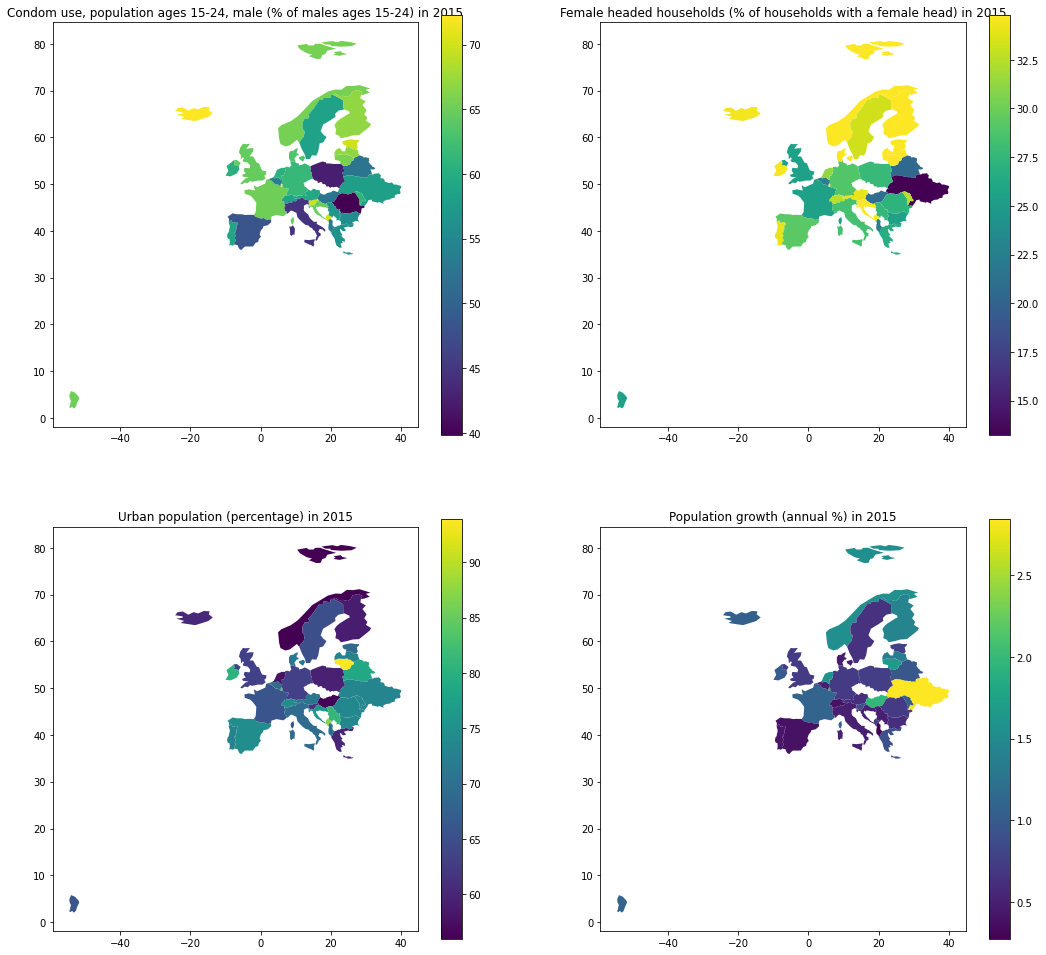

In [36]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.continent == 'Europe']

world.columns = ['pop_est', 'continent', 'Country', 'CODE', 'gdp_md_est', 'geometry']

dfu = dfu.rename(columns={'CountryName': 'Country'})

dfu['Urban population (percentage)'] = dfu['Urban population'] / dfu['Population, total'] * 100.0

cols = ['Condom use, population ages 15-24, male (% of males ages 15-24)', 
        'Female headed households (% of households with a female head)',
        'Urban population (percentage)',
        'Population growth (annual %)']
col_idx_map = {1: 'Condom use, population ages 15-24, male (% of males ages 15-24)', 
               2: 'Female headed households (% of households with a female head)',
               3: 'Urban population (percentage)',
               4: 'Population growth (annual %)'}
name_idx_map = {1: 'Condom use, population ages 15-24, male (% of males ages 15-24)', 
               2: 'Female headed households (% of households with a female head)',
               3: 'Urban population (percentage)',
               4: 'Population growth (annual %)'}
df_list = []

for col in cols:
    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    merge = pd.merge(world, df1, on='Country')
    df_list.append(merge)

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(18)
fig.set_figheight(17)

count=0
for r in range(2):
    for c in range(2):
        ax = df_list[count].plot(column=col_idx_map[count+1], ax=axes[r, c], legend=True)
        ax.title.set_text(name_idx_map[count+1] + ' in 2015')
        count += 1
        

plt.show()

# Possible correlations

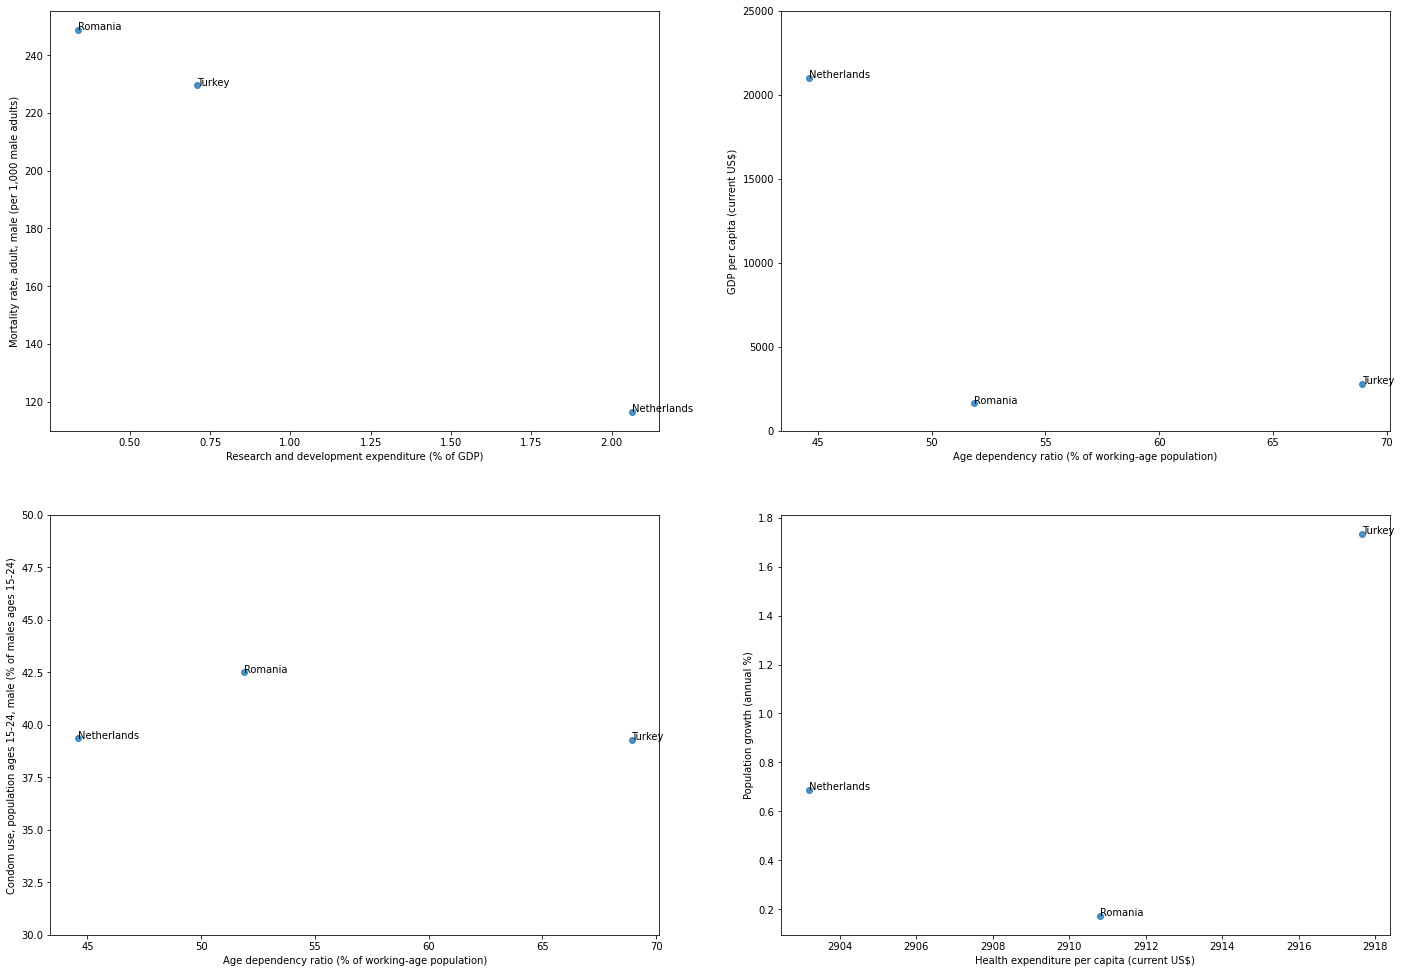

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

countries_to_compare = ['Romania', 'Netherlands', 'Turkey']

df_new = dfu[dfu['Country'].isin(countries_to_compare) * dfu['Year'] == 1990]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figwidth(24)
fig.set_figheight(17)


# plt.ylim(500, 50000)
sns.regplot(data = df_new, x = df_new["Research and development expenditure (% of GDP)"], y = df_new["Mortality rate, adult, male (per 1,000 male adults)"], fit_reg= False, ax = ax1)
for i in range(df_new.shape[0]):
  ax1.text(x = df_new["Research and development expenditure (% of GDP)"].iloc[i], y = df_new["Mortality rate, adult, male (per 1,000 male adults)"].iloc[i], s = df_new["Country"].iloc[i])

ax2.set_ylim(0, 25000)
sns.regplot(data = df_new, x = df_new["Age dependency ratio (% of working-age population)"], y = df_new["GDP per capita (current US$)"], fit_reg= False, ax = ax2)
for i in range(df_new.shape[0]):
  ax2.text(x = df_new["Age dependency ratio (% of working-age population)"].iloc[i], y = df_new["GDP per capita (current US$)"].iloc[i], s = df_new["Country"].iloc[i])

ax3.set_ylim(30, 50)
sns.regplot(data = df_new, x = df_new["Age dependency ratio (% of working-age population)"], y = df_new["Condom use, population ages 15-24, male (% of males ages 15-24)"], fit_reg= False, ax = ax3)
for i in range(df_new.shape[0]):
  ax3.text(x = df_new["Age dependency ratio (% of working-age population)"].iloc[i], y = df_new["Condom use, population ages 15-24, male (% of males ages 15-24)"].iloc[i], s = df_new["Country"].iloc[i])


sns.regplot(data = df_new, x = df_new["Health expenditure per capita (current US$)"], y = df_new["Population growth (annual %)"], fit_reg= False, ax = ax4)
for i in range(df_new.shape[0]):
  ax4.text(x = df_new["Health expenditure per capita (current US$)"].iloc[i], y = df_new["Population growth (annual %)"].iloc[i], s = df_new["Country"].iloc[i])

# 3D Barplot

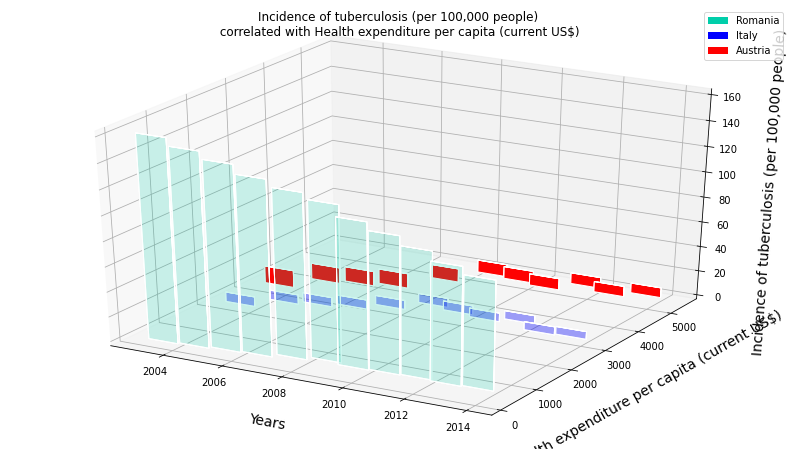

Incidence of tuberculosis (per 100,000 people)
Austria


10665    14.0
10912    13.0
11159    12.0
11406    12.0
11653    11.0
11900    10.0
12147     9.8
12394     9.3
12641     8.9
12888     8.5
13135     8.1
Name: Incidence of tuberculosis (per 100,000 people), dtype: float64

In [20]:
# eu_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
#                 'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
#                 'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
#                 'United Kingdom']

from matplotlib import colors

# column_1 = 'Improved sanitation facilities (% of population with access)'
# column_2 = 'Mortality rate, under-5, female (per 1,000 live births)'
column_1 = 'Health expenditure per capita (current US$)'
column_2 = 'Incidence of tuberculosis (per 100,000 people)'

country_1 = 'Romania'
country_2 = 'Italy'
country_3 = 'Austria'

# dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]
dfu1 = dfu[dfu['Year'].isin(list(range(2003, 2014)))]

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(8)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == country_1]['Year']
ypos = dfu1[dfu1['Country'] == country_1][column_1]
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == country_1][column_2]
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == country_2]['Year']
ypos = dfu1[dfu1['Country'] == country_2][column_1]
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == country_2][column_2]
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == country_3]['Year']
ypos = dfu1[dfu1['Country'] == country_3][column_1]
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == country_3][column_2]
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], [country_1, country_2, country_3])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel(column_1, fontsize=14, labelpad=20)
ax1.set_zlabel(column_2, fontsize=14, labelpad=15) 
ax1.set_title(column_2 + '\n correlated with ' + column_1)

plt.show()

pick_column = column_2
pick_country = country_3

print(pick_column)
print(pick_country)

dfu1[dfu1['Country'] == pick_country][pick_column]

# All at once 3D Barplot

In [13]:
# %rm -rf '/content/gdrive/MyDrive/InfoVis/figures'
# %mkdir '/content/gdrive/MyDrive/InfoVis/figures'

In [14]:
import os
from matplotlib import colors

other_european_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                      'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'France', 
                      'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                      'United Kingdom', 'Serbia', 'Belarus', 'Moldova', 'Albania', 'Montenegro', 'Bosnia and Herzegovina', 'Kosovo', 'Montenegro', 
                      'Macedonia, FYR', 'Ukraine', 'Iceland'] # eu_countries, without Romania

column_1_list = ['GDP per capita (current US$)', 
                 'GDP per capita growth (annual %)', 
                 'GNI (current US$)', 
                 'GNI per capita growth (annual %)', 
                 'Health expenditure per capita (current US$)']
column_2_list = ['Incidence of tuberculosis (per 100,000 people)', 
                 'Female headed households (% of households with a female head)', 
                 'Cause of death, by injury (% of total)', 
                 'Maternal mortality ratio (modeled estimate, per 100,000 live births)', 
                 'Maternal mortality ratio (national estimate, per 100,000 live births)', 
                 'Number of maternal deaths', 'Number of neonatal deaths', 
                 'Newborns protected against tetanus (%)']

country_reference = 'Romania'
countries_groups = [
    [country_reference, other_european_countries[i], other_european_countries[i + 1]]
    for i in range(0, len(other_european_countries), 2)
    ]

dfu1 = dfu[dfu['Year'].isin(list(range(2000, 2017)))]

for column_1 in column_1_list:
    for column_2 in column_2_list:
        for countries_group in countries_groups:
            country_1 = countries_group[0]
            country_2 = countries_group[1]
            country_3 = countries_group[2]

            fig = plt.figure()
            fig.set_figwidth(14)
            fig.set_figheight(8)

            ax1 = fig.add_subplot(111, projection='3d')
            xpos = dfu1[dfu1['Country'] == country_1]['Year']
            ypos = dfu1[dfu1['Country'] == country_1][column_1]
            num_elements = len(xpos)
            zpos = np.zeros(ypos.shape[0])
            dx = np.ones(xpos.shape[0])
            dy = np.ones(ypos.shape[0])
            dz = dfu1[dfu1['Country'] == country_1][column_2]
            rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
            rgba = rgb + (alpha,)
            ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

            xpos = dfu1[dfu1['Country'] == country_2]['Year']
            ypos = dfu1[dfu1['Country'] == country_2][column_1]
            num_elements = len(xpos)
            zpos = np.zeros(ypos.shape[0])
            dx = np.ones(xpos.shape[0])
            dy = np.ones(ypos.shape[0])
            dz = dfu1[dfu1['Country'] == country_2][column_2]
            rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
            rgba = rgb + (alpha,)
            ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

            xpos = dfu1[dfu1['Country'] == country_3]['Year']
            ypos = dfu1[dfu1['Country'] == country_3][column_1]
            num_elements = len(xpos)
            zpos = np.zeros(ypos.shape[0])
            dx = np.ones(xpos.shape[0])
            dy = np.ones(ypos.shape[0])
            dz = dfu1[dfu1['Country'] == country_3][column_2]
            rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
            rgba = rgb + (alpha,)
            ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

            ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
            nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
            dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
            ax1.legend([ro_proxy, nl_proxy, dm_proxy], [country_1, country_2, country_3])

            ax1.set_xlabel('Years', fontsize=14, labelpad=20)
            ax1.set_ylabel(column_1, fontsize=14, labelpad=20)
            ax1.set_zlabel(column_2, fontsize=14, labelpad=15) 
            ax1.set_title(column_2 + '\n correlated with ' + column_1)

            # plt.show()

            fig_name = column_1.replace(' ', '_') + '-correlated-with-' + column_2.replace(' ', '_') + \
                '-countries-' + country_1 + '-' + country_2 + '-' + country_3 + '.jpg'
            fig_path = '/content/gdrive/MyDrive/InfoVis/figures/' + fig_name
            if not os.path.exists(fig_path):
                fig.savefig(fig_path)

            plt.clf()
            fig.clf()
            plt.close()
            del ax1
            del fig

# pick_column = column_2
# pick_country = country_3

# print(pick_column)
# print(pick_country)

# dfu1[dfu1['Country'] == pick_country][pick_column]

In [14]:
dfu.columns

Index(['Unnamed: 0', 'Country', 'Year', 'GDP per capita (current US$)',
       'GDP per capita growth (annual %)', 'GNI (current US$)',
       'GNI per capita growth (annual %)',
       'Health expenditure per capita (current US$)',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)', 'Urban population', 'Rural population',
       'Improved sanitation facilities (% of population with access)',
       'Improved water source (% of population with access)',
       'Merchandise exports (current US$)',
       'Merchandise imports (current US$)',
       'Exports of goods and services (annual % growth)',
       'Crop production index (2004-2006 = 100)',
       'Research and development expenditure (% of GDP)',
       'Natural gas rents (% of GDP)', 'Debt stock reduction (current US$)',
       'General government final consumption expenditure (current US$)',
       'Exports of goods and services (current US$)',
       'Imports of goods and servic

# All at once Geographical Heatmaps

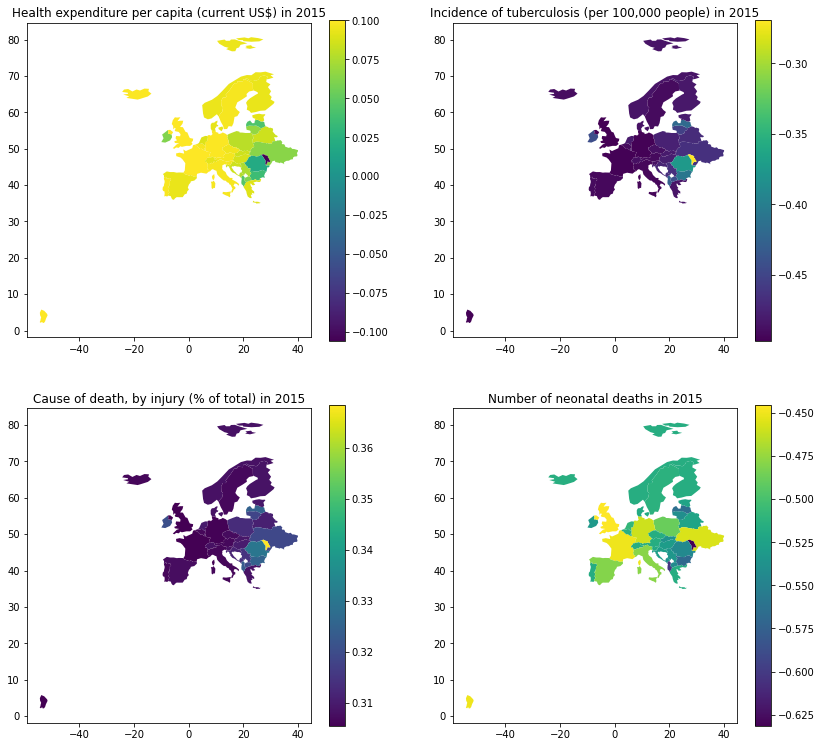

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.continent == 'Europe']

world.columns = ['pop_est', 'continent', 'Country', 'CODE', 'gdp_md_est', 'geometry']

world = world.replace('Macedonia', 'Macedonia, FYR')
world = world.replace('Czechia', 'Czech Republic')
world = world.replace('Bosnia and Herz.', 'Bosnia and Herzegovina')
world = world.replace('Slovakia', 'Slovak Republic')

cols = ['Health expenditure per capita (current US$)',
        'Incidence of tuberculosis (per 100,000 people)', 
        'Cause of death, by injury (% of total)', 
        'Number of neonatal deaths']
col_idx_map = {1: 'Health expenditure per capita (current US$)', 
               2: 'Incidence of tuberculosis (per 100,000 people)',
               3: 'Cause of death, by injury (% of total)',
               4: 'Number of neonatal deaths'}
name_idx_map = {1: 'Health expenditure per capita (current US$)', 
                2: 'Incidence of tuberculosis (per 100,000 people)',
                3: 'Cause of death, by injury (% of total)',
                4: 'Number of neonatal deaths'}
df_list = []

# Kosovo looks bad..try to remove it
if 'Kosovo' in european_countries:
    european_countries.remove('Kosovo')

for col in cols:
    df = dfn
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    merge = pd.merge(world, df1, on='Country')
    df_list.append(merge)

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(13)

count=0
for r in range(2):
    for c in range(2):
        ax = df_list[count].plot(column=col_idx_map[count+1], ax=axes[r, c], legend=True)
        ax.title.set_text(name_idx_map[count+1] + ' in 2015')
        count += 1
        

plt.show()

# Violin Plot

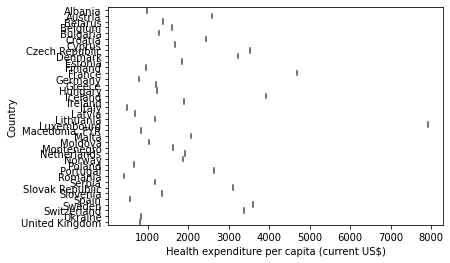

In [39]:
import seaborn as sns

cols = ['Health expenditure per capita (current US$)',
        'Incidence of tuberculosis (per 100,000 people)', 
        'Cause of death, by injury (% of total)', 
        'Maternal mortality ratio (modeled estimate, per 100,000 live births)', 
        'Number of maternal deaths', 
        'Number of neonatal deaths', 
        'Newborns protected against tetanus (%)']

for col in cols:
    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    sns.violinplot(x=df1[col], y=df1['Country'])
    break

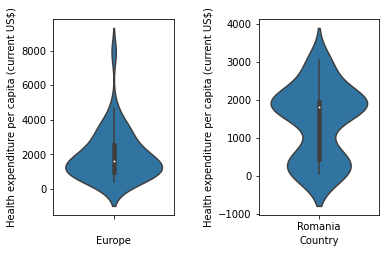

In [7]:
for col in cols:
    fig, axs = plt.subplots(ncols=2)

    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    # Switch
    df1['Country'] = df1[col]
    df1[col] = ' '
    
    # Rename
    country_replacement_name = 'Europe'

    df1.columns = [df1.columns[1], country_replacement_name]
    
    sns.violinplot(x=df1[country_replacement_name], y=df1[col], ax=axs[0])

    # For Romania (all years)
    df2 = df[df['Country'].isin(['Romania'])][['Country', col]]

    sns.violinplot(x=df2['Country'], y=df2[col], ax=axs[1])

    fig.tight_layout(pad=3.0)

    plt.show()

    fig.clf()
    plt.clf()
    plt.close()
    break

In [130]:
# %rm -rf '/content/gdrive/MyDrive/InfoVis/figures-violinplot'
# %mkdir '/content/gdrive/MyDrive/InfoVis/figures-violinplot'

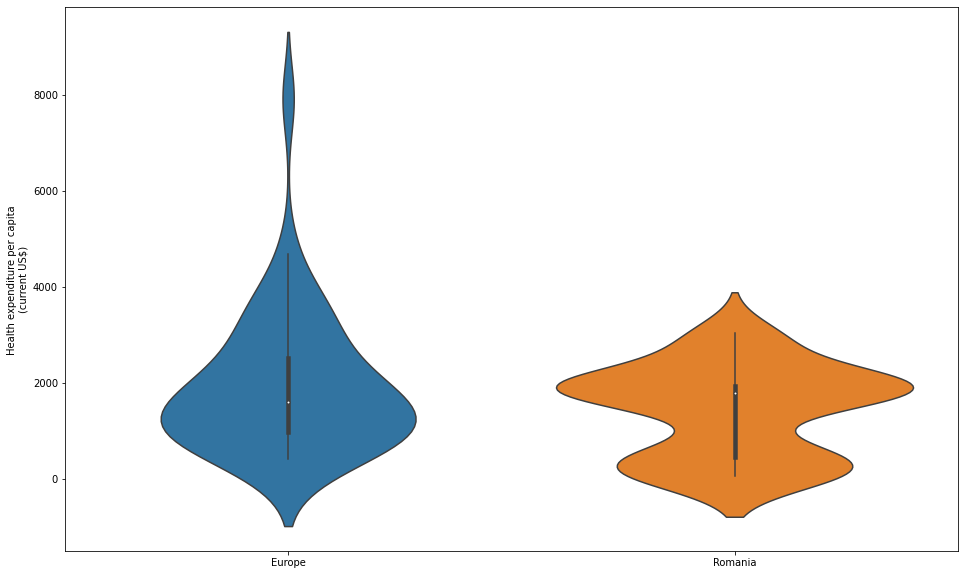

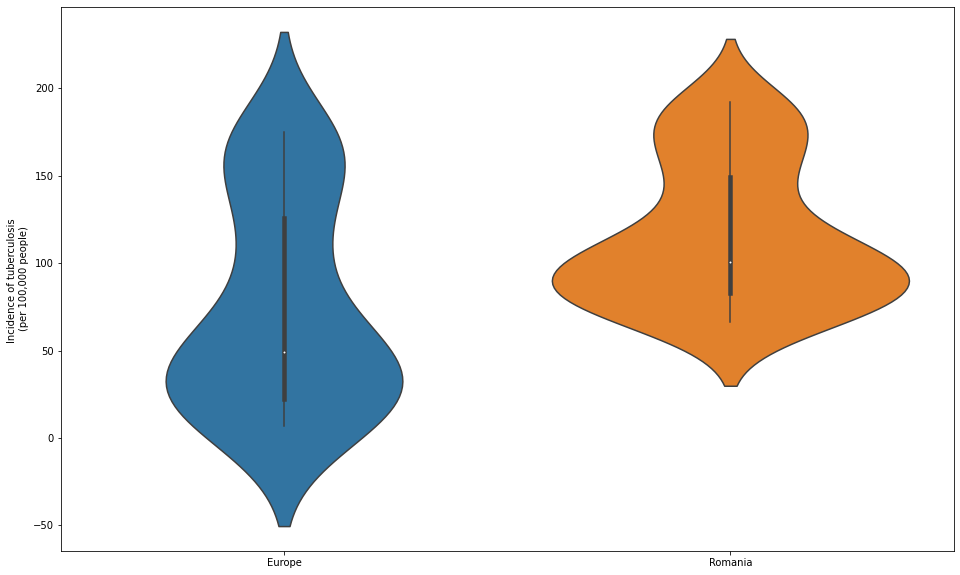

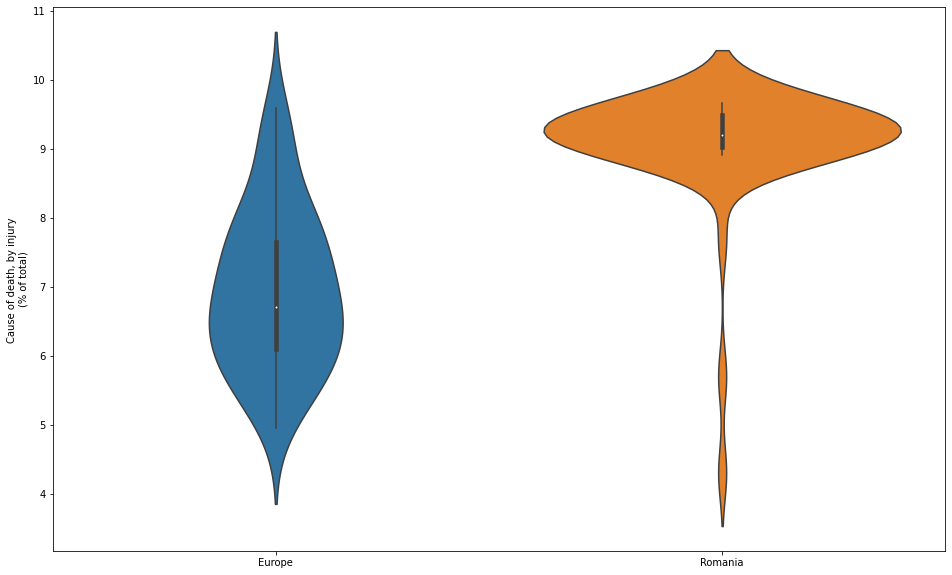

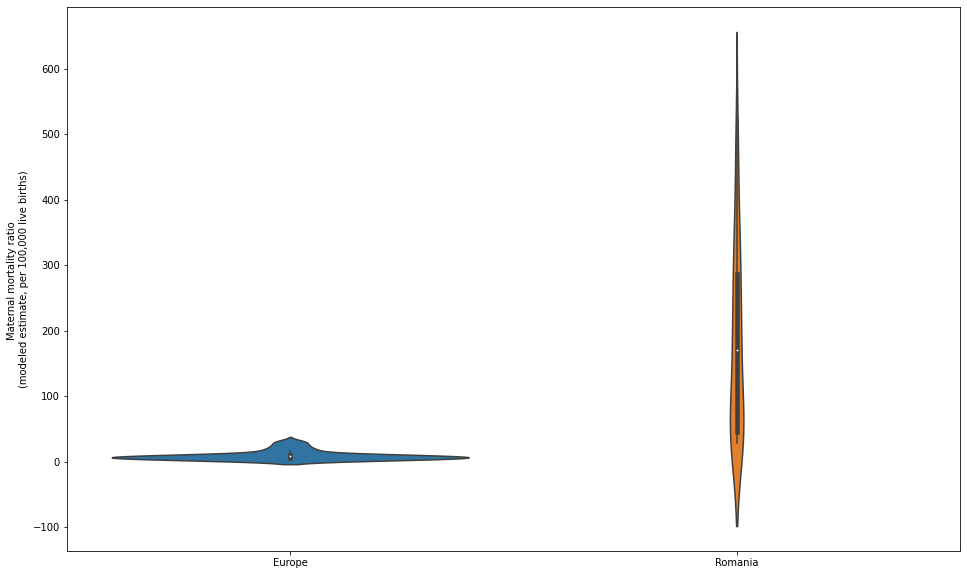

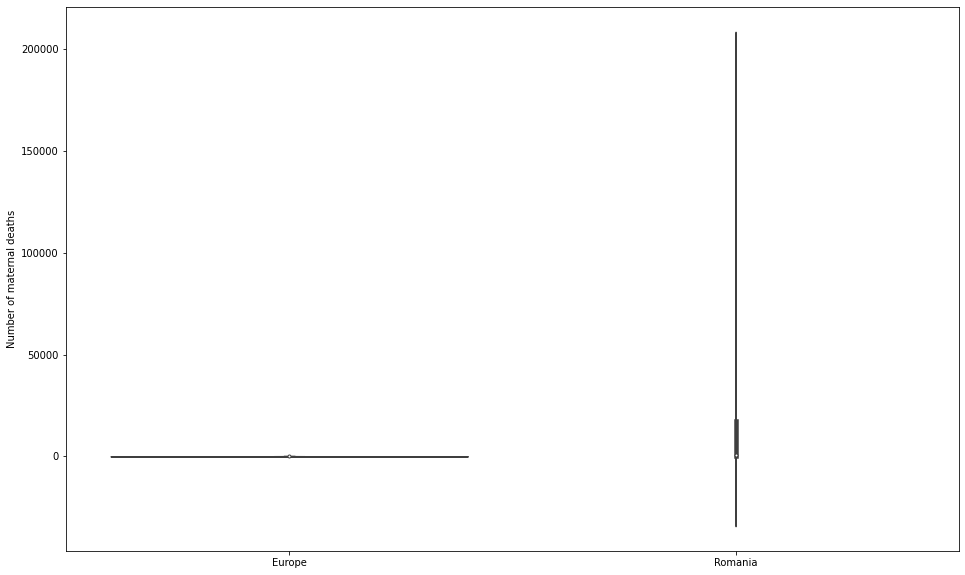

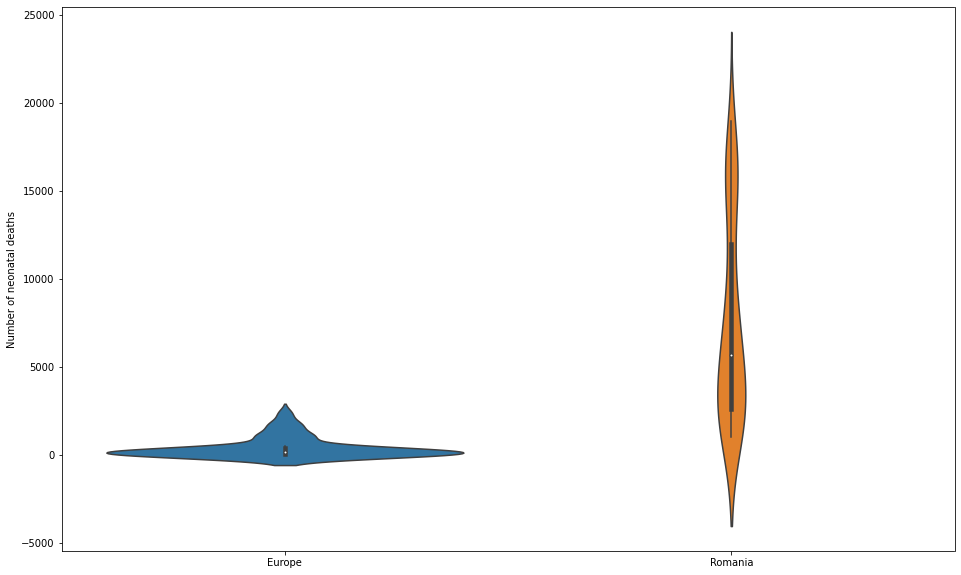

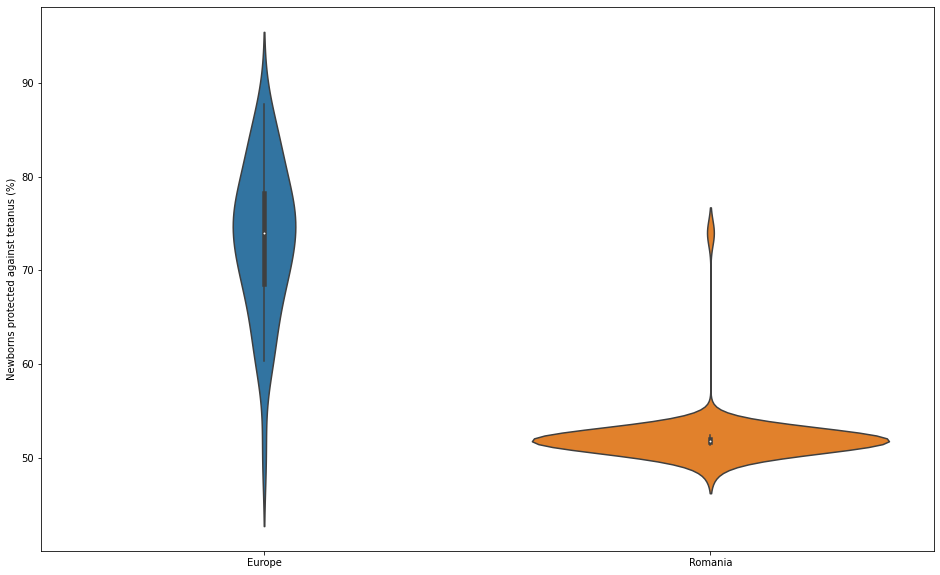

In [9]:
import os

for col in cols:
    if '(' in col and '(%)' not in col:
        col_plot_name = col.replace('(', '\n(')
    else:
        col_plot_name = col
    
    # fig, axs = plt.subplots(ncols=2)

    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    # Switch
    df1['Country'] = df1[col]
    df1[col] = 'Europe'
    
    # Rename
    country_replacement_name = ''

    df1.columns = [col_plot_name, country_replacement_name]
    
    # sns.violinplot(x=df1[country_replacement_name], y=df1[col], ax=axs[0])
    # print(country_replacement_name)
    # print(df1[country_replacement_name])
    # print(col)
    # print(df1[col])
    # print(len(list(df1[col])))

    # For Romania (all years)
    df2 = df[df['Country'].isin(['Romania'])][['Country', col]]

    # Switch
    df2['Country'] = df2[col]
    df2[col] = 'Romania'

    # Rename
    df2.columns = [col_plot_name, country_replacement_name]

    # print(df1.columns)
    # print(df1[df1.columns[0]])
    # print(df1[df1.columns[1]])
    # print(df2.columns)
    # print(df2[df2.columns[0]])
    # print(df2[df2.columns[1]])

    df3 = pd.concat([df1, df2])
    # print(df3.columns)
    # print(df3[df3.columns[0]])
    # print(df3[df3.columns[1]])
    # sns.violinplot(x=df2['Country'], y=df2[col], ax=axs[1])

    # fig.tight_layout(pad=3.0)

    fig = plt.figure()
    fig.set_figwidth(16)
    fig.set_figheight(10)

    sns.violinplot(x=df3[country_replacement_name], y=df3[col_plot_name])

    plt.show()

    fig_name = col.replace(' ', '_') + '.jpg'
    fig_path = '/content/gdrive/MyDrive/InfoVis/figures-violinplot/' + fig_name
    if not os.path.exists(fig_path):
        fig.savefig(fig_path)
    
    fig.clf()
    plt.clf()
    plt.close()

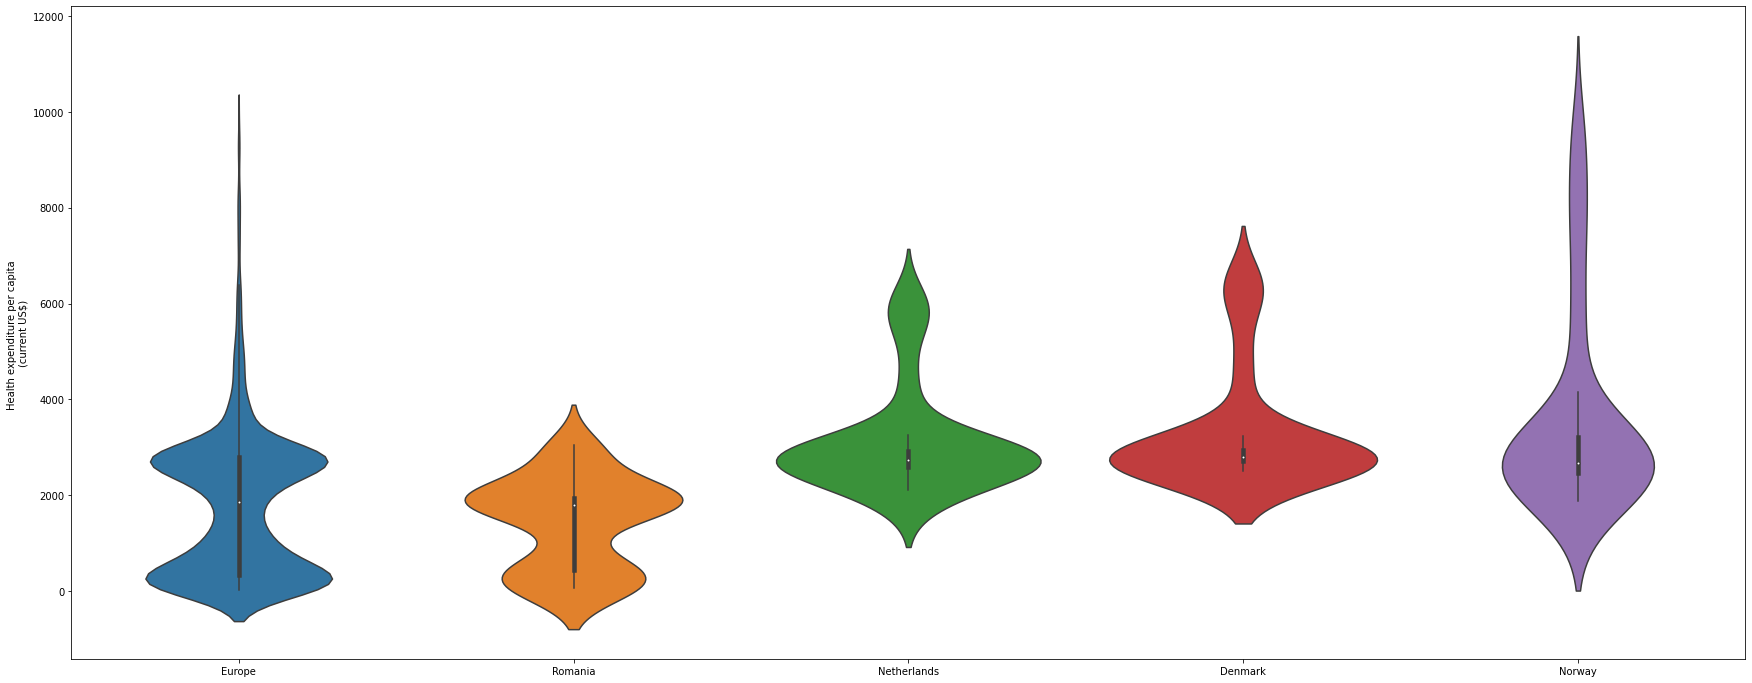

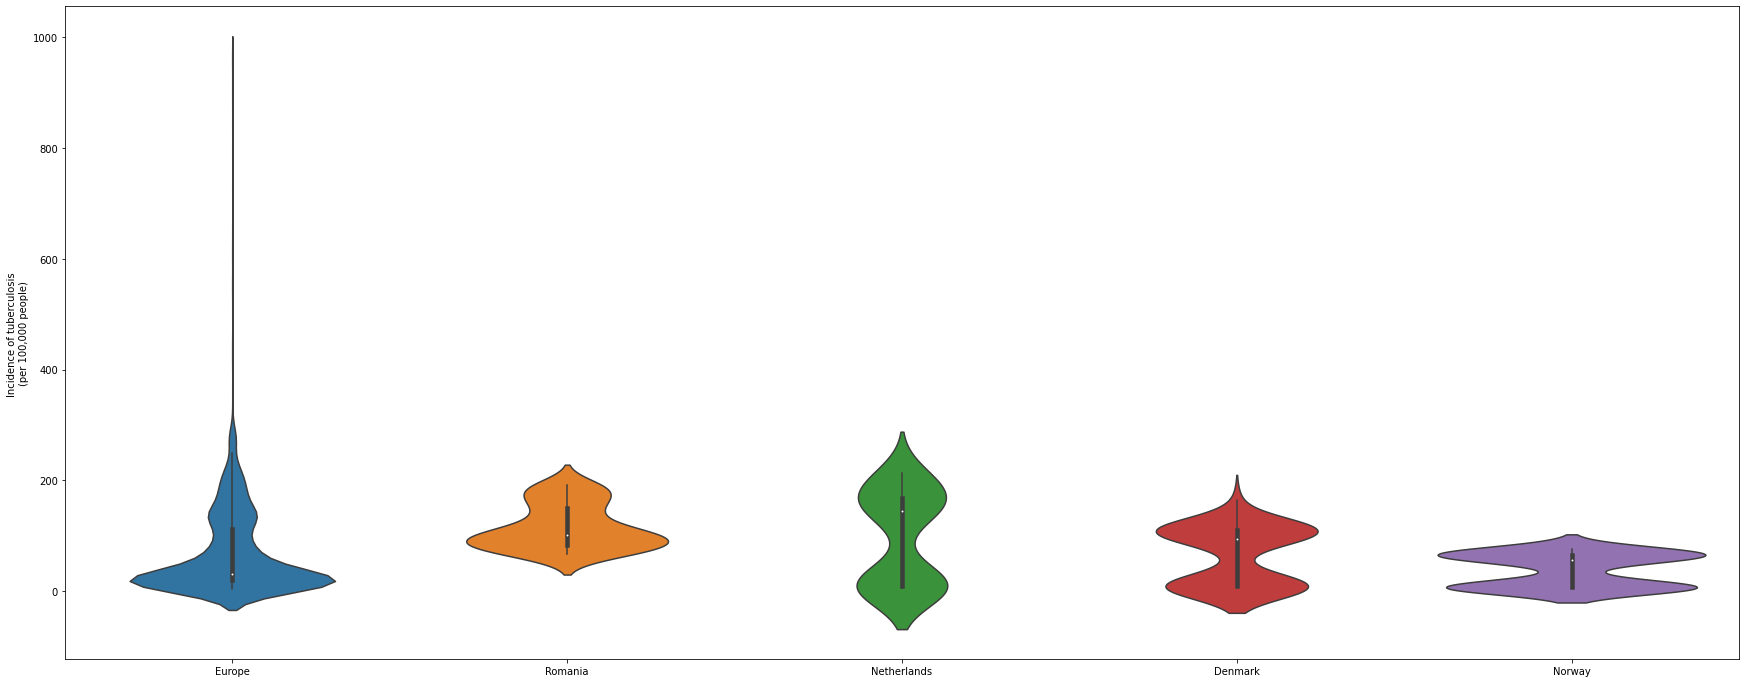

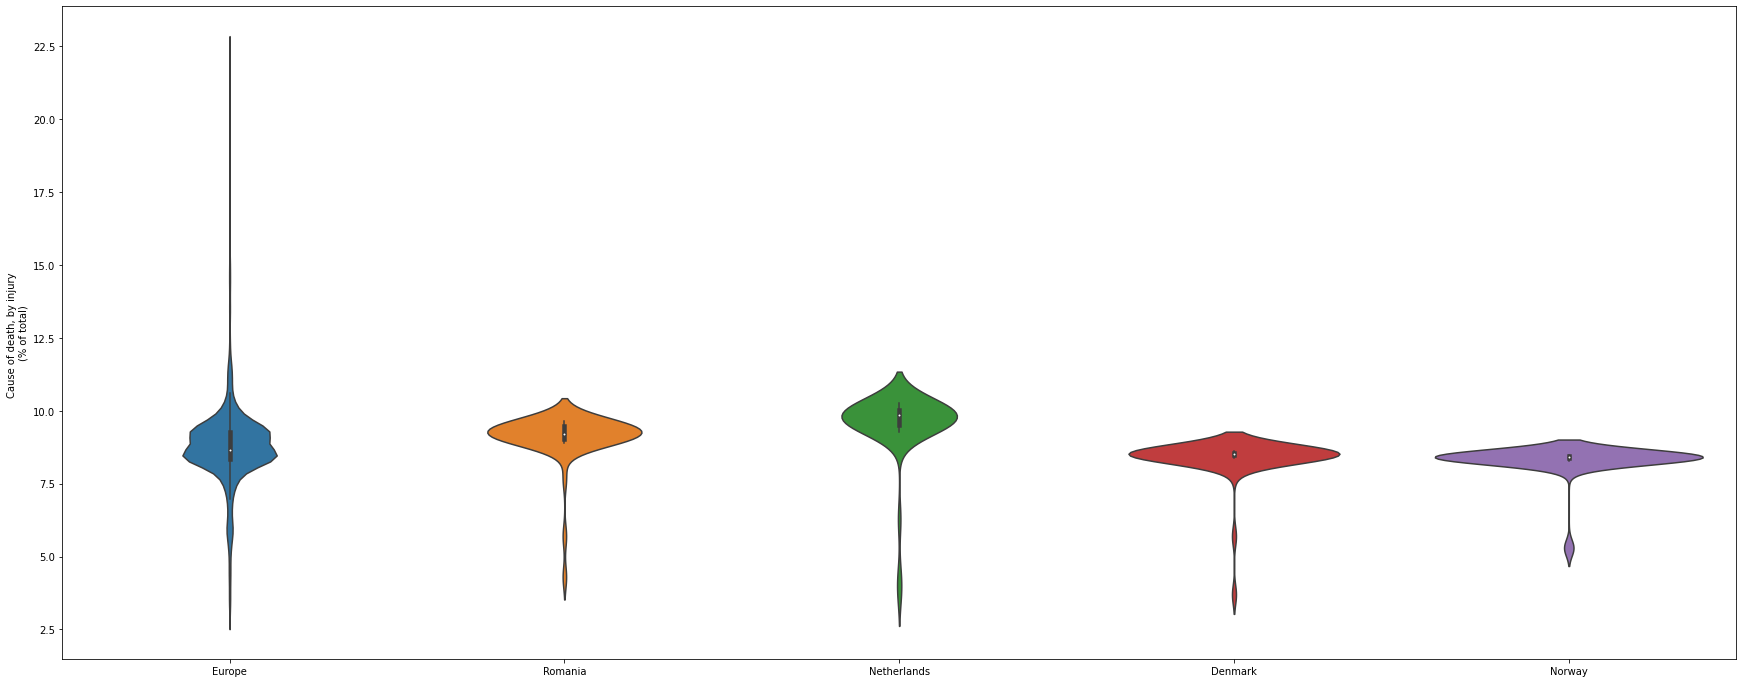

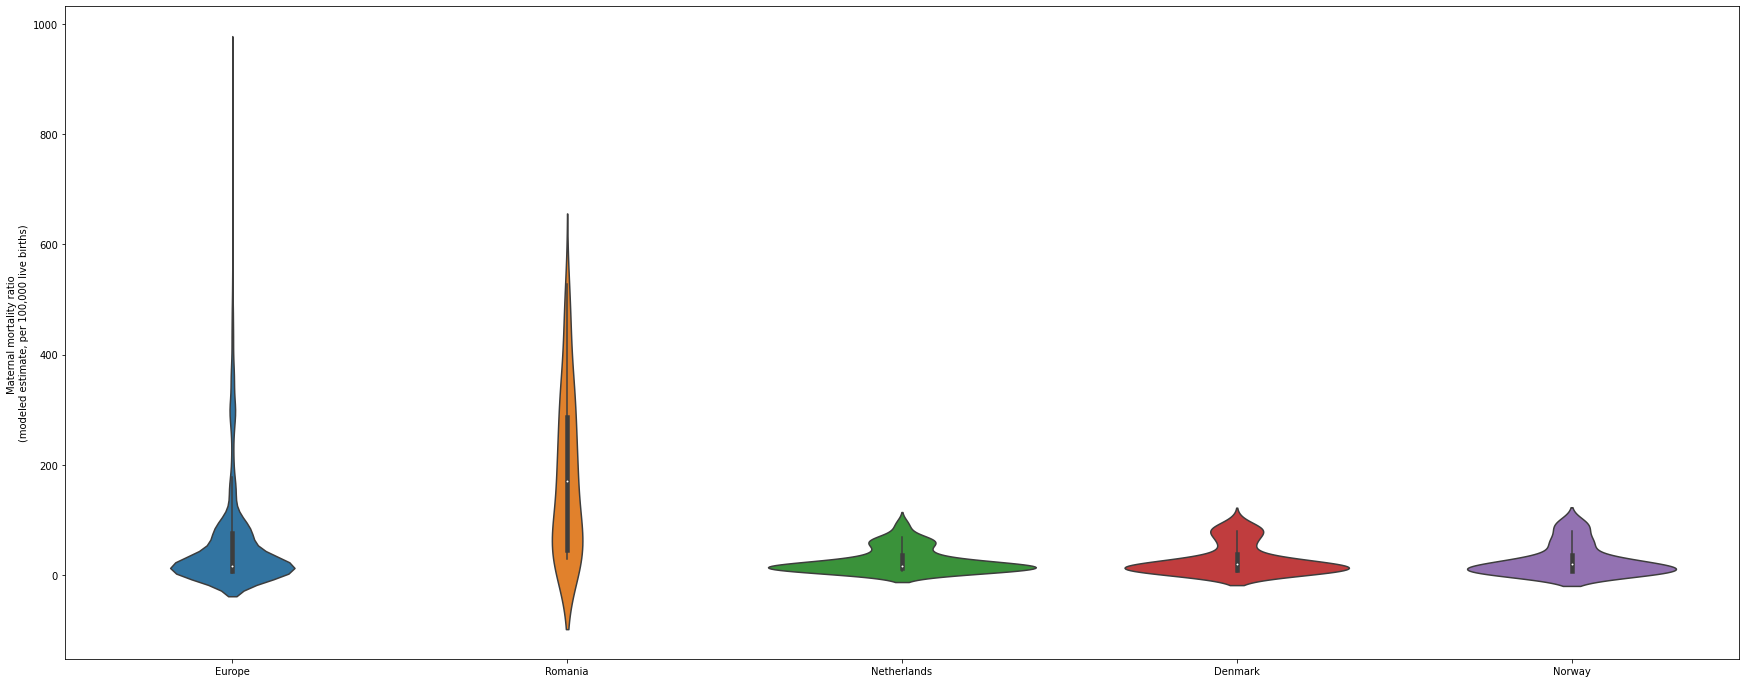

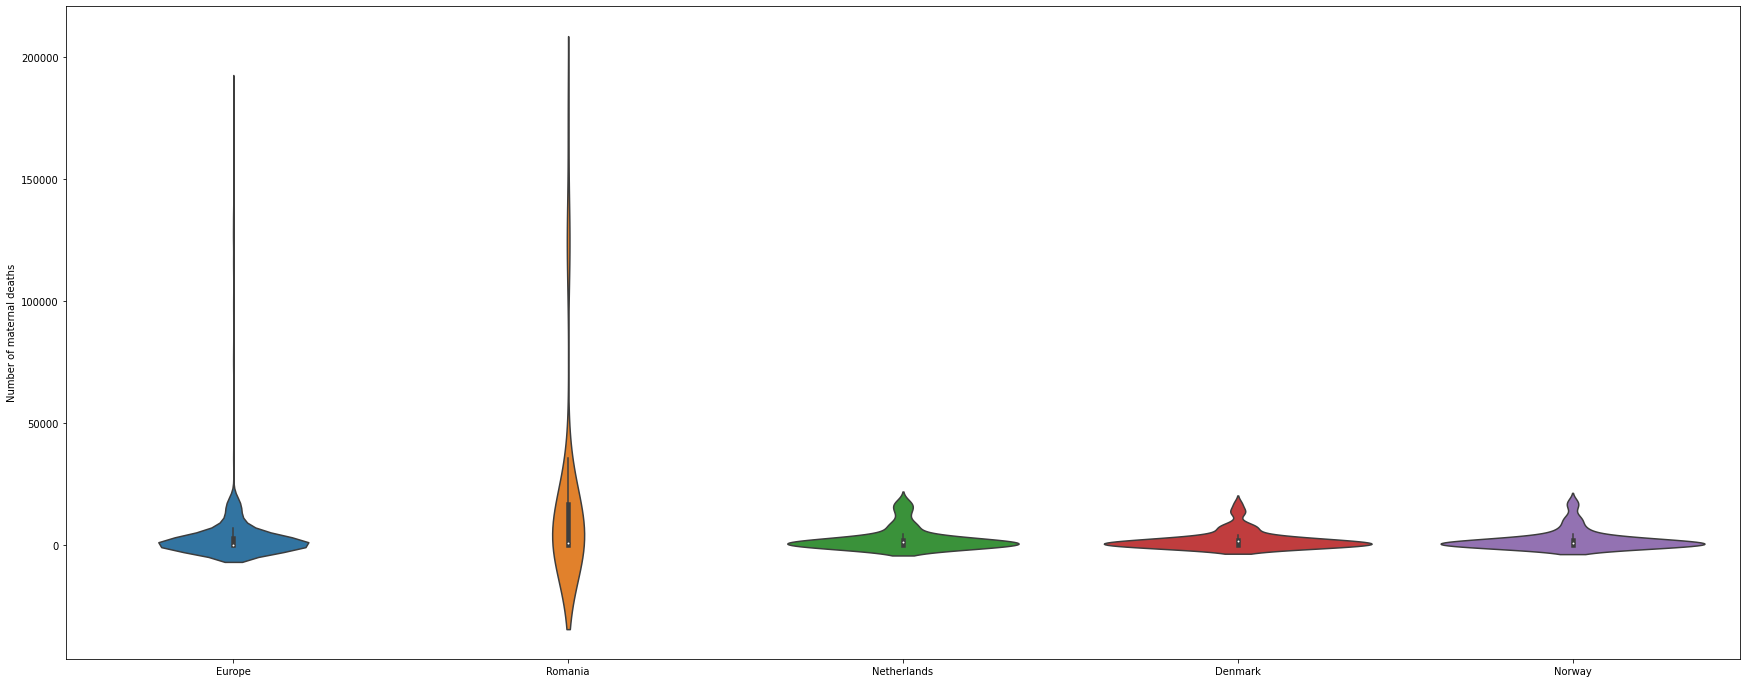

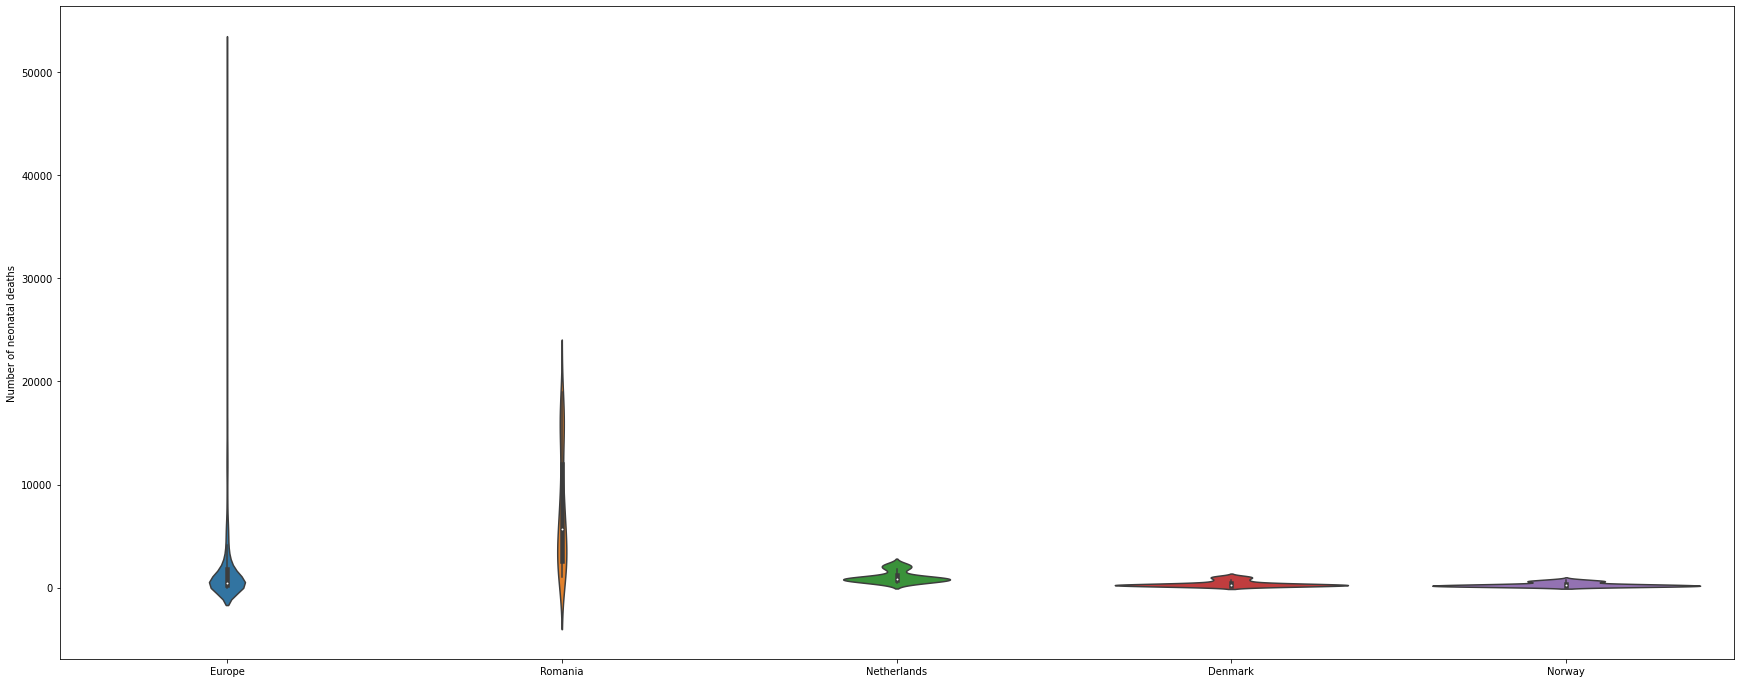

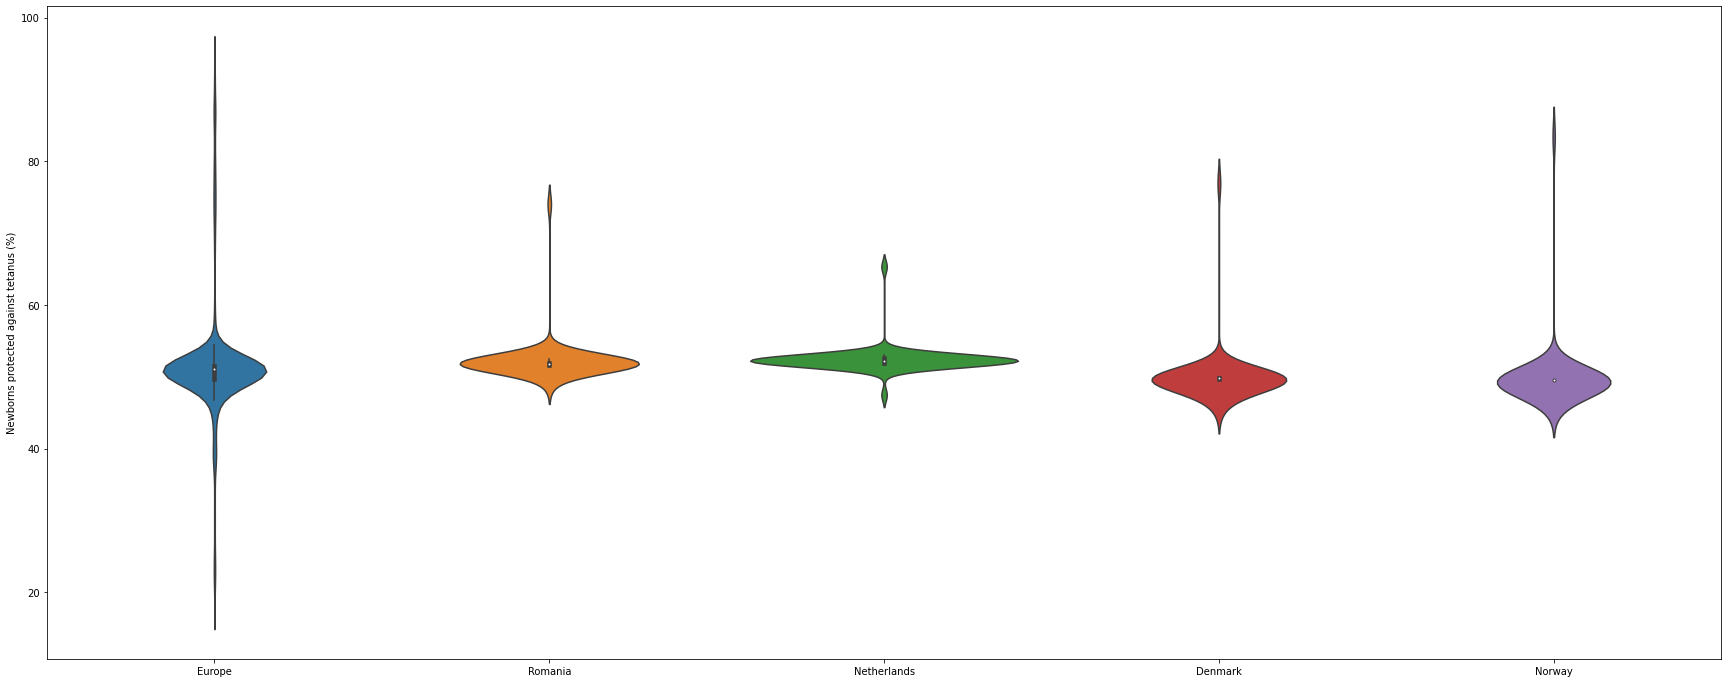

In [10]:
import os

for col in cols:
    if '(' in col and '(%)' not in col:
        col_plot_name = col.replace('(', '\n(')
    else:
        col_plot_name = col
    
    # fig, axs = plt.subplots(ncols=2)

    df = dfu
    df_eu = df[df['Country'].isin(european_countries)][['Country', col]]

    # Switch
    df_eu['Country'] = df_eu[col]
    df_eu[col] = 'Europe'
    
    # Rename
    country_replacement_name = ''

    df_eu.columns = [col_plot_name, country_replacement_name]
    
    # For other countries (all years)
    other_countries = ['Romania', 'Netherlands', 'Denmark', 'Norway']
    dfs_to_concat = [df_eu]
    for country in other_countries:
        df_other = df[df['Country'].isin([country])][['Country', col]]

        # Switch
        df_other['Country'] = df_other[col]
        df_other[col] = country

        # Rename
        df_other.columns = [col_plot_name, country_replacement_name]

        dfs_to_concat.append(df_other)

    df_final = pd.concat(dfs_to_concat)

    # fig.tight_layout(pad=3.0)

    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(12)

    sns.violinplot(x=df_final[country_replacement_name], y=df_final[col_plot_name])

    plt.show()

    fig_name = col.replace(' ', '_')  + '-other-countries-full.jpg'
    fig_path = '/content/gdrive/MyDrive/InfoVis/figures-violinplot/' + fig_name
    if not os.path.exists(fig_path):
        fig.savefig(fig_path)
    
    fig.clf()
    plt.clf()
    plt.close()

In [11]:
# np.unique(list(dfu[dfu['Year'].isin(range(1976, 2015))]['Year'])).shape[0]
np.unique(list(dfu['Year']))

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

# Ridgeline

In [247]:
# %rm -rf '/content/gdrive/MyDrive/InfoVis/figures-ridge'
# %mkdir '/content/gdrive/MyDrive/InfoVis/figures-ridge'

In [39]:
# getting necessary libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
from copy import deepcopy

# getting the data
temp_initial = deepcopy(dfu[dfu['Country'].isin(european_countries)])

# Since we do not want to plot 50+ lines, we only select some years to plot
year_list = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
temp_initial = temp_initial[temp_initial['Year'].isin(year_list)]

for col in cols:
    if '(' in col and '(%)' not in col:
        col_plot_name = col.replace('(', '\n(')
    else:
        col_plot_name = col
    
    temp_col = temp_initial[['Year', col]]
    temp_col[col] = temp_col[col].astype('int64')

    # Calculate decrease interval
    min_p = int(temp_col[col].min())
    max_p = int(temp_col[col].max())
    max_units = 20
    increment = (max_p - min_p) / max_units
    possibilities = []
    current = min_p
    while current < max_p:
        if current not in possibilities:
            possibilities.append(current)
        current = int(current + increment)
        if current in possibilities:
            current = current + 1
    possibilities.append(max_p)
    print(possibilities)

    # Apply decrease interval
    for index, row in temp_col.iterrows():
        i = 0
        val = row[col]
        new_val = possibilities[0]
        while i < len(possibilities) - 1 and not (possibilities[i] <= val and val <= possibilities[i+1]):
            i = i + 1
        if i == 0:
            if val - possibilities[0] <= possibilities[1] - val:
                new_val = possibilities[0]
            else:
                new_val = possibilities[1]
        elif i == len(possibilities) - 1:
            new_val = possibilities[-1]
        else:
            if val - possibilities[i] <= possibilities[i + 1] - val:
                new_val = possibilities[i]
            else:
                new_val = possibilities[i+1]

        temp_col.at[index, col] = new_val

    # Count
    temp = deepcopy(
        temp_col
            .groupby(['Year', col])
            .agg({col: 'count'})
            .rename(columns={col: 'count'})
            .reset_index()
        )

    # the idea behind this ridgeline plot with Plotly is to add traces manually, each trace corresponding to a particular year's temperature distribution
    # thus, we are to store each year's data (temperatures and their respective count) in seperate arrays or pd.series that we store in a dictionnary to retrieve them easily
    array_dict = {} # instantiating an empty dictionnary
    for year in year_list:
        array_dict[f'x_{year}'] = temp[temp['Year']==year][col] # storing the temperature data for each year
        array_dict[f'y_{year}'] = temp[temp['Year']==year]['count'] # storing the temperature count for each year
        array_dict[f'y_{year}'] = (array_dict[f'y_{year}'] - array_dict[f'y_{year}'].min()) \
                                    / (array_dict[f'y_{year}'].max() - array_dict[f'y_{year}'].min()) # we normalize the array (min max normalization)

    # once all of this is done, we can create a plotly.graph_objects.Figure and add traces with fig.add_trace() method
    # since we have stored the temperatures and their respective count for each year, we can plot scatterplots (go.Scatter)
    # we thus iterate over year_list and create a 'blank line' that is placed at y = index, then the corresponding temperature count line
    fig = go.Figure()
    for index, year in enumerate(year_list):
        fig.add_trace(go.Scatter(
                                x=[-20, 100], y=np.full(2, len(year_list)-index),
                                mode='lines',
                                line_color='white'))
        
        fig.add_trace(go.Scatter(
                                x=array_dict[f'x_{year}'],
                                y=array_dict[f'y_{year}'] + (len(year_list)-index) + 0.4,
                                fill='tonexty',
                                name=f'{year}'))
        
        # plotly.graph_objects' way of adding text to a figure
        fig.add_annotation(
                            x=-20,
                            y=len(year_list)-index,
                            text=f'{year}',
                            showarrow=False,
                            yshift=10)

    # here you can modify the figure and the legend titles
    fig.update_layout(
                    title='Average ' + col + ' from ' + str(year_list[0]) + ' until ' + str(year_list[-1]) + ' in Europe',
                    showlegend=False,
                    xaxis=dict(title=col),
                    yaxis=dict(showticklabels=False) # that way you hide the y axis ticks labels
                    )

    fig.show()

    year = 1990
    # print(array_dict['x_' + str(year)])
    # print(array_dict['y_' + str(year)])
    # print(temp[temp['Year'] == year])

    fig_name = 'Average ' + col + ' from ' + str(year_list[0]) + ' until ' + str(year_list[-1]) + ' in Europe' + '.jpg'
    fig_name.replace(' ', '_')

    # fig.write_image('/content/gdrive/MyDrive/InfoVis/figures-ridge/' + fig_name)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[23, 430, 837, 1244, 1651, 2058, 2465, 2872, 3279, 3686, 4093, 4500, 4907, 5314, 5721, 6128, 6535, 6942, 7349, 7756, 8163, 8164]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[4, 43, 82, 121, 160, 199, 238, 277, 316, 355, 394, 433, 472, 511, 550, 589, 628, 667, 706, 745, 784, 789]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[3, 49, 95, 141, 187, 233, 279, 325, 371, 417, 463, 509, 555, 601, 647, 693, 739, 785, 831, 877, 923, 936]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[0, 8712, 17424, 26136, 34848, 43560, 52272, 60984, 69696, 78408, 87120, 95832, 104544, 113256, 121968, 130680, 139392, 148104, 156816, 165528, 174240, 174257]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[4, 2104, 4204, 6304, 8404, 10504, 12604, 14704, 16804, 18904, 21004, 23104, 25204, 27304, 29404, 31504, 33604, 35704, 37804, 39904, 42004, 42006]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 88]


In [14]:
import orca
print(orca.__version__)

1.2.0


In [29]:
import plotly
print(plotly.__version__)
print(plotly.io.orca.config.executable)

4.4.1
orca


In [26]:
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1- x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

--2021-05-13 12:23:45--  https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-05-13 12:23:45 ERROR 404: Not Found.

--2021-05-13 12:23:45--  http://x86_64.appimage/
Resolving x86_64.appimage (x86_64.appimage)... failed: Name or service not known.
wget: unable to resolve host address ‘x86_64.appimage’
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  gconf-service gconf-service-backend gconf2-common libdbus-glib-1-2
  libgail-common libgail18 libgtk2.0-bin libgtk2.0-common
Suggested packages:
  gvfs
The following NEW packages will be installed:
  gconf-service gcon

In [34]:
!chmod +x /usr/local/bin/orca

In [35]:
!ls -la /usr/local/bin/orca

-rwxr-xr-x 1 root root 0 May 13 12:23 /usr/local/bin/orca


In [28]:
plotly.io.orca.config.executable = 'orca'
plotly.io.orca.config.save()

In [17]:
!pip show orca

Name: orca
Version: 1.2.0
Summary: A pipeline orchestration tool with Pandas support
Home-page: https://github.com/synthicity/orca
Author: Synthicity
Author-email: mdavis@synthicity.com
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: toolz, pandas, tables, zbox
Required-by: 


In [12]:
!pip install orca==1.2.0

     |████████████████████████████████| 245kB 28.8MB/s 


# Bubble

In [ ]:
!pip install gapminder

In [65]:
# %rm -rf '/content/gdrive/MyDrive/InfoVis/figures-bubble'
# %mkdir '/content/gdrive/MyDrive/InfoVis/figures-bubble'

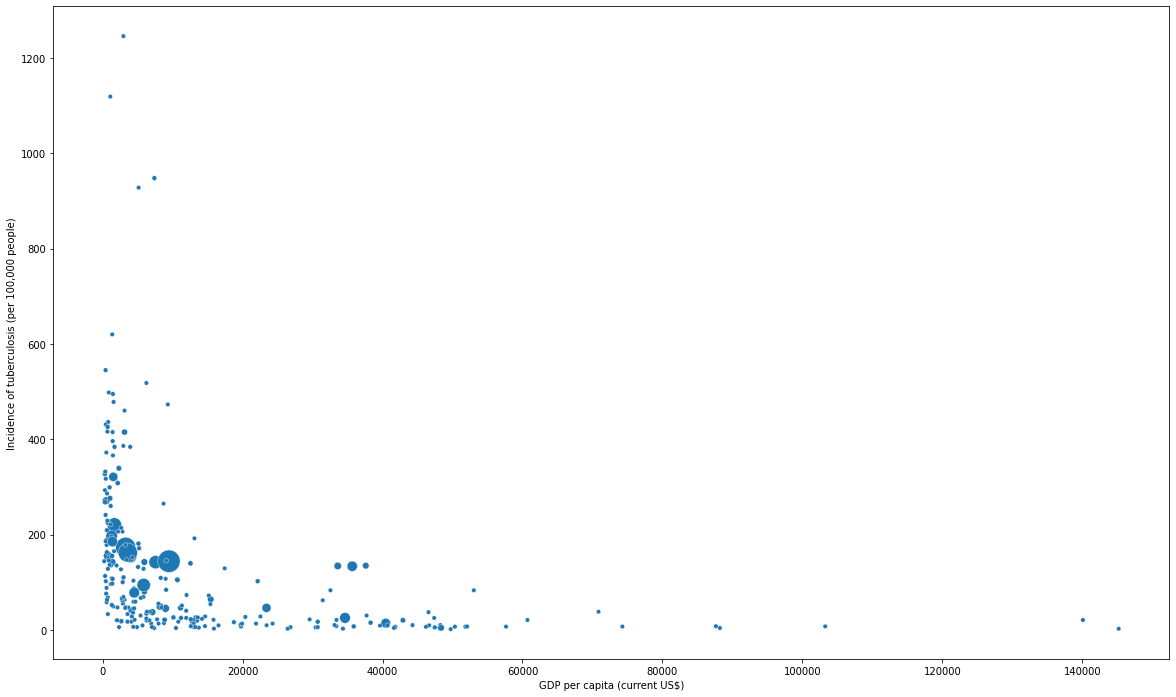

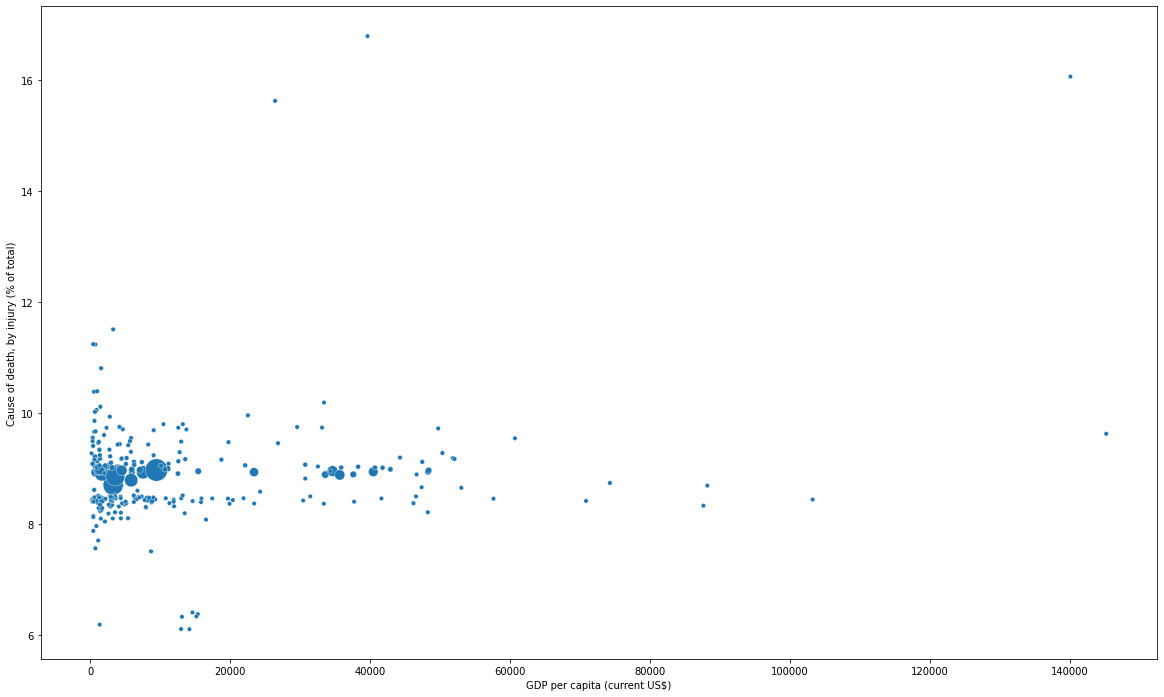

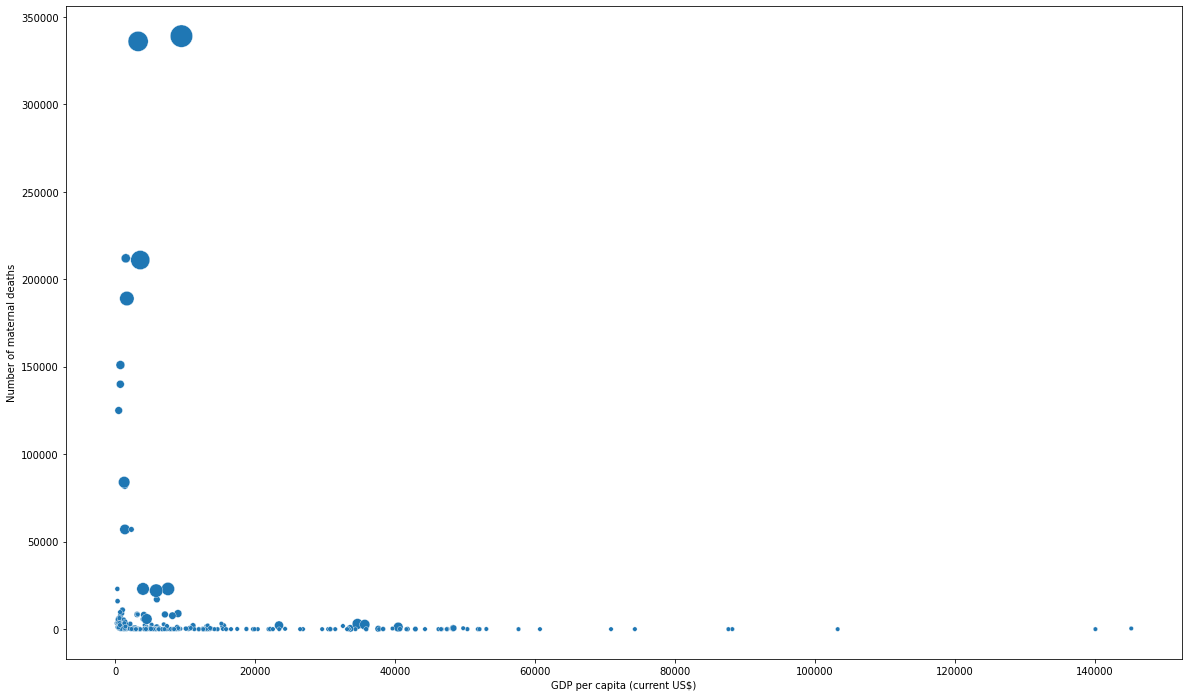

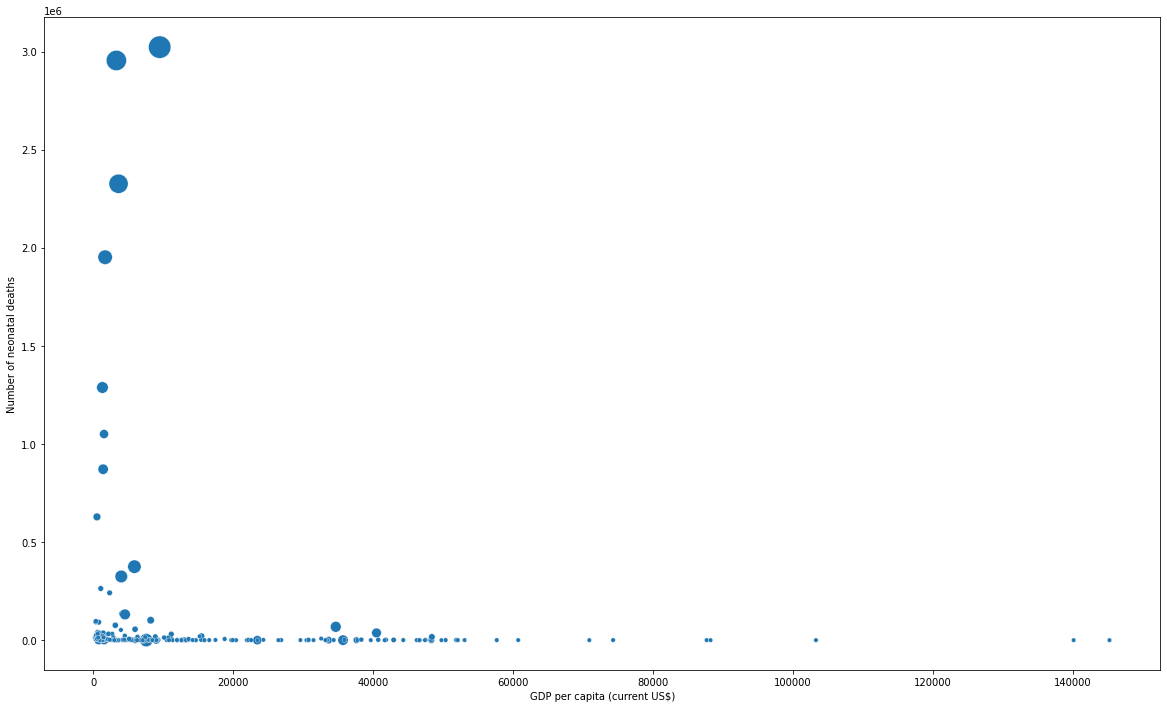

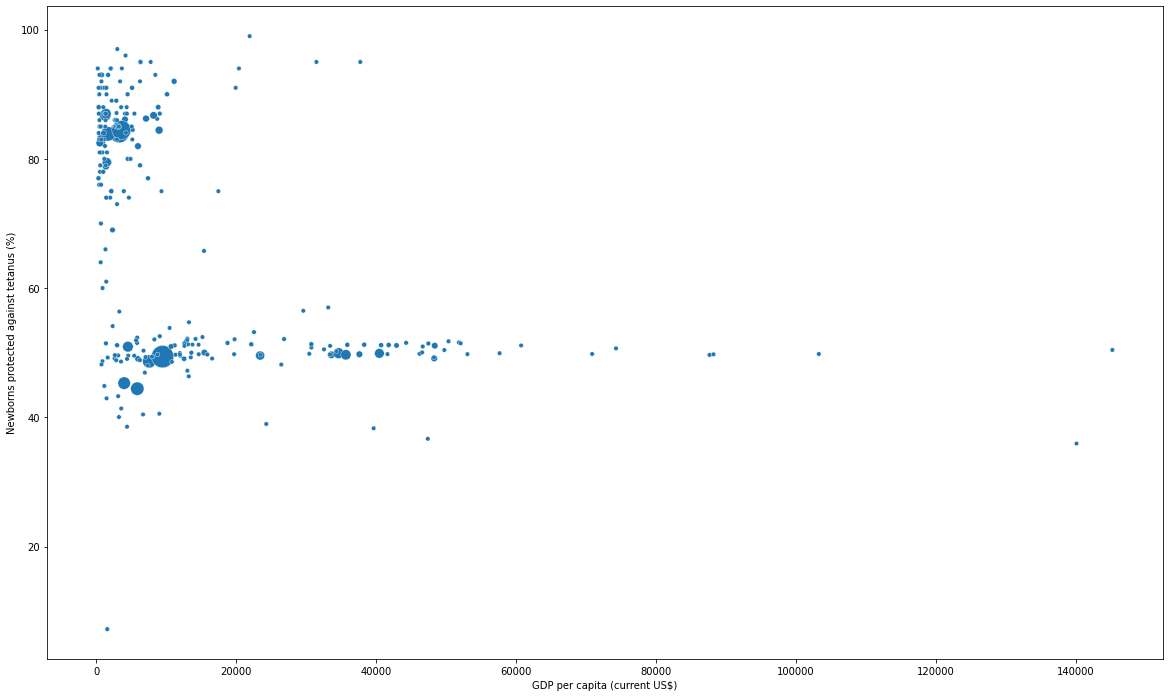

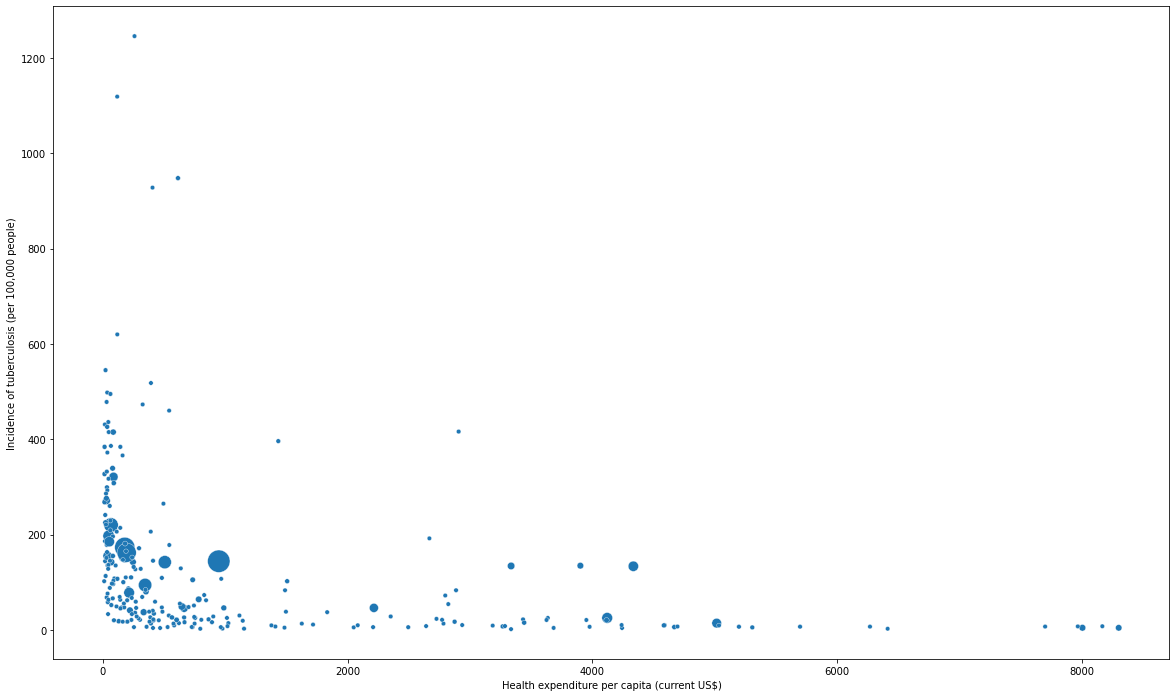

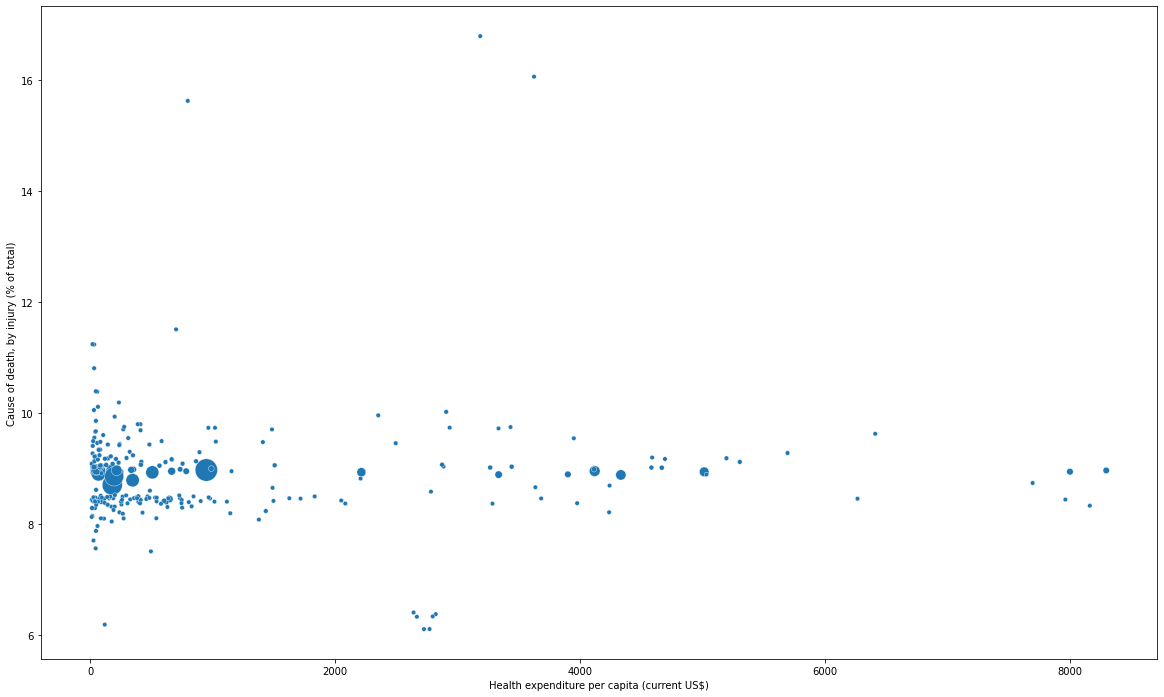

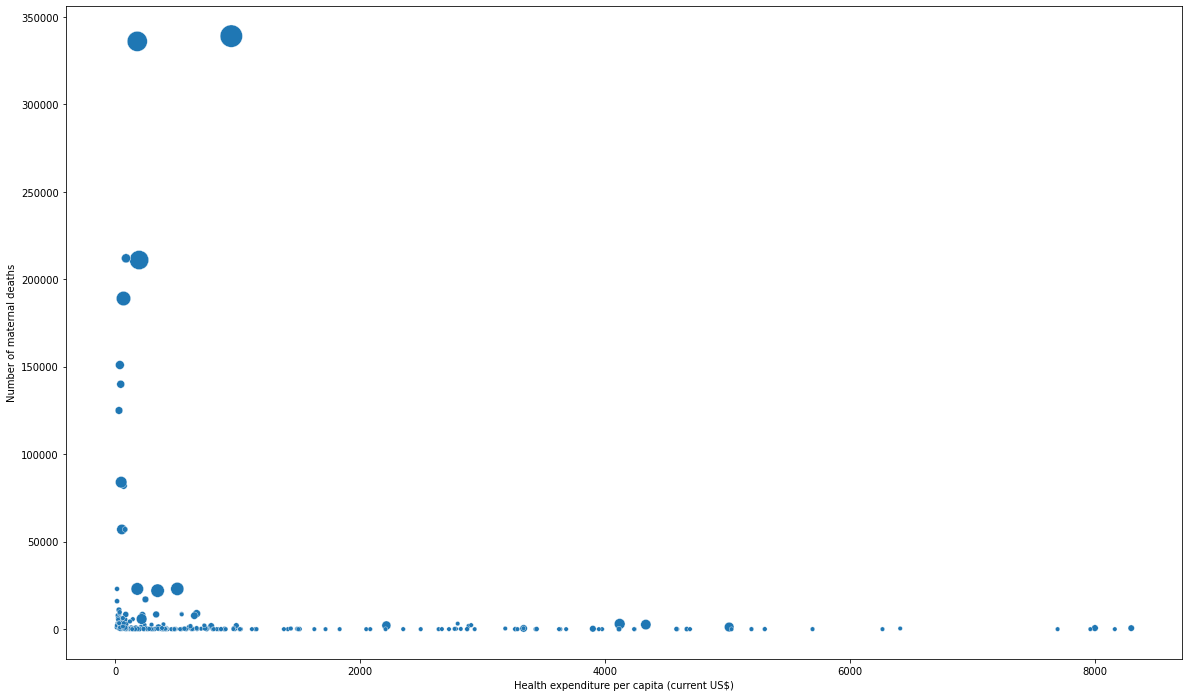

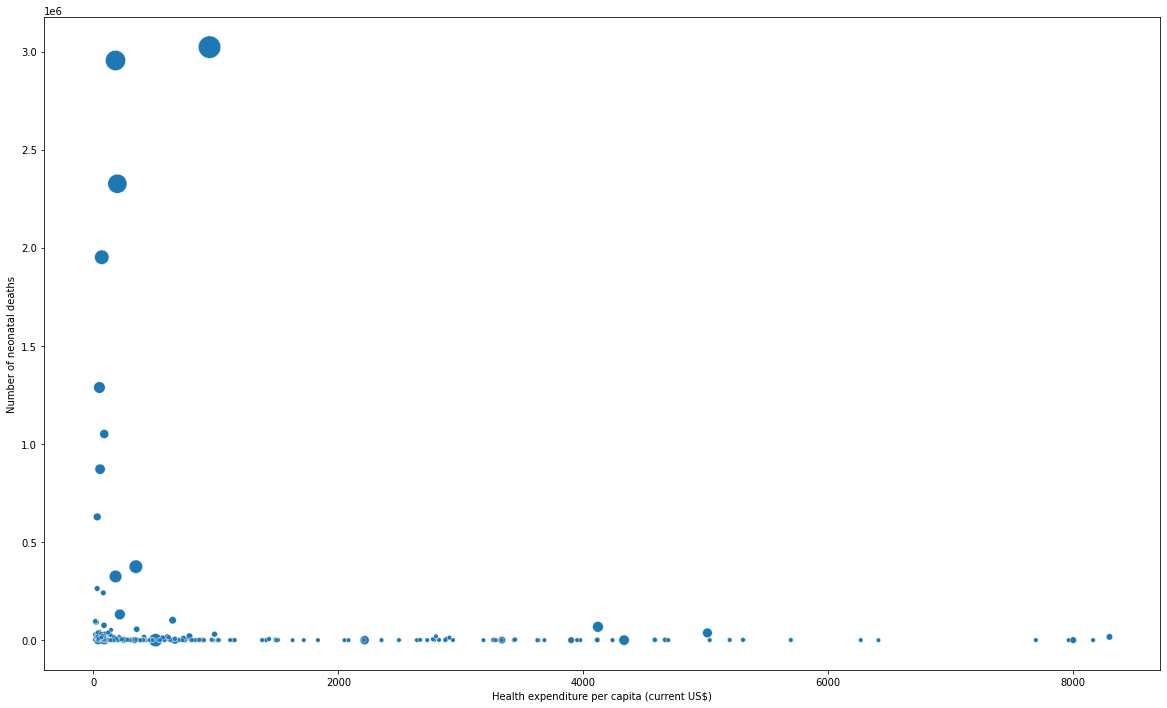

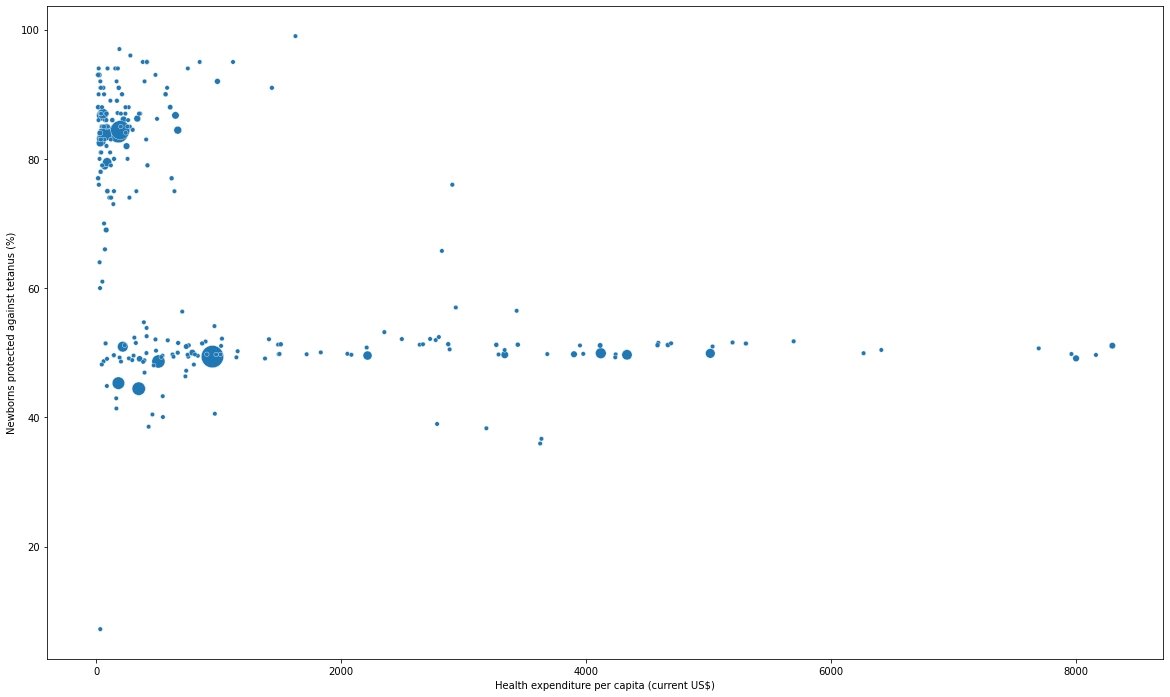

In [72]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # data set

column_1_list = ['GDP per capita (current US$)', 
                 'Health expenditure per capita (current US$)']
column_2_list = ['Incidence of tuberculosis (per 100,000 people)', 
                 'Cause of death, by injury (% of total)', 
                 'Number of maternal deaths', 'Number of neonatal deaths', 
                 'Newborns protected against tetanus (%)']

# data
year = 2010
for column_1 in column_1_list:
    for column_2 in column_2_list:
        df = dfu[dfu['Year'] == year]

        fig = plt.figure()
        fig.set_figwidth(20)
        fig.set_figheight(12)

        # use the scatterplot function to build the bubble map
        sns.scatterplot(data=df, 
                        x=column_1, 
                        y=column_2, 
                        size='Population, total', legend=False, 
                        sizes=(20, 500))

        # show the graph
        plt.show()

        fig_name = column_1.replace(' ', '_') + '-correlated-with-' + column_2.replace(' ', '_') + '-year-' + str(year) + '.jpg'
        fig_path = '/content/gdrive/MyDrive/InfoVis/figures-bubble/' + fig_name
        if not os.path.exists(fig_path):
            fig.savefig(fig_path)
        
        fig.clf()
        plt.clf()
        plt.close()

# Lollipop

In [104]:
# %rm -rf '/content/gdrive/MyDrive/InfoVis/figures-lollipop'
# %mkdir '/content/gdrive/MyDrive/InfoVis/figures-lollipop'

In [41]:
print(european_countries)

['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta', 'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 'United Kingdom', 'Serbia', 'Belarus', 'Moldova', 'Albania', 'Montenegro', 'Montenegro', 'Macedonia, FYR', 'Ukraine', 'Iceland']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


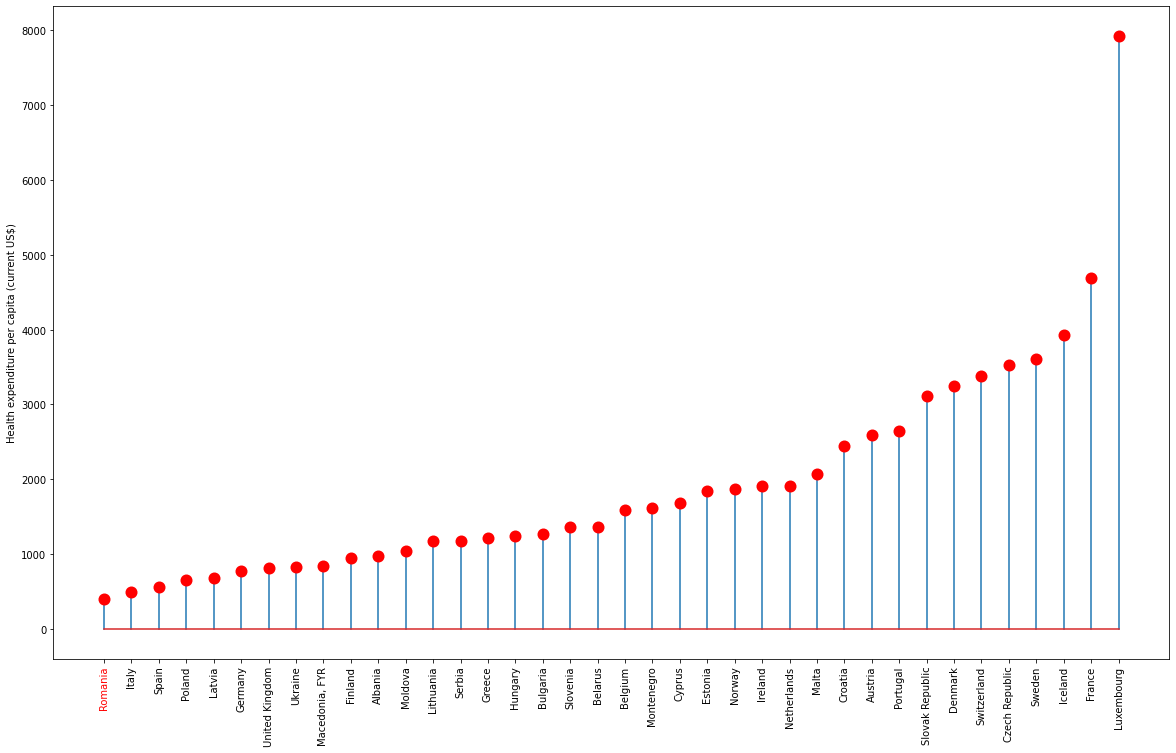

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


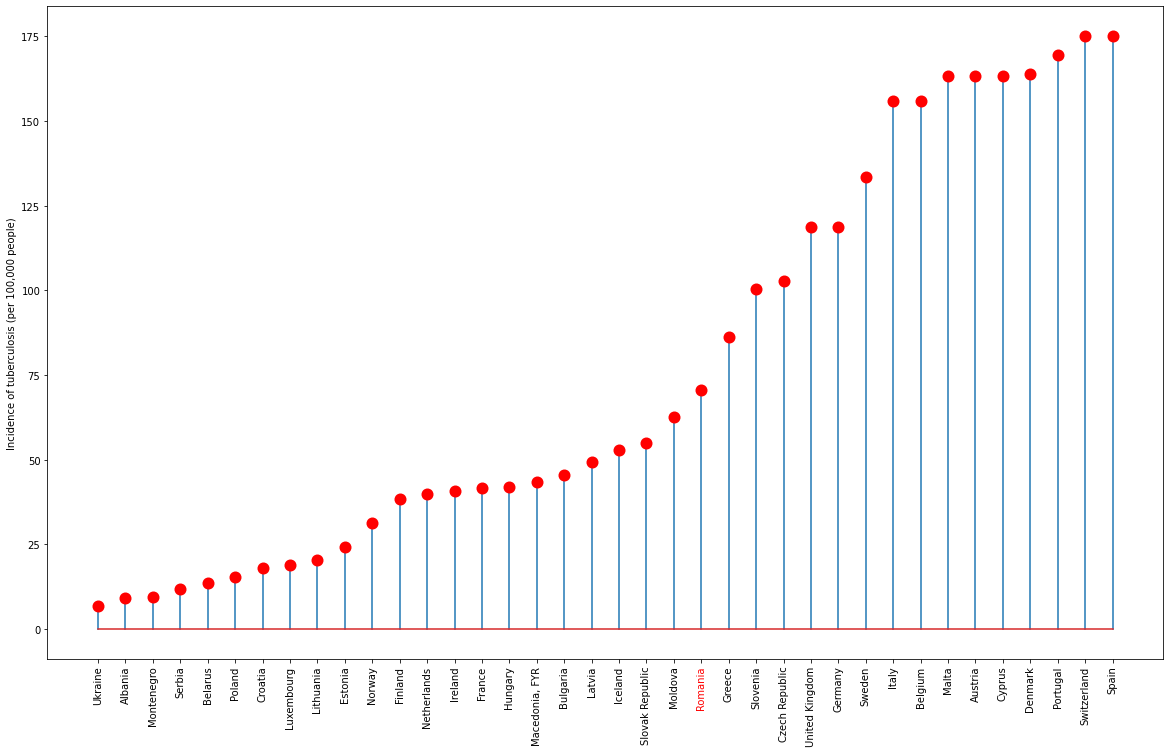

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


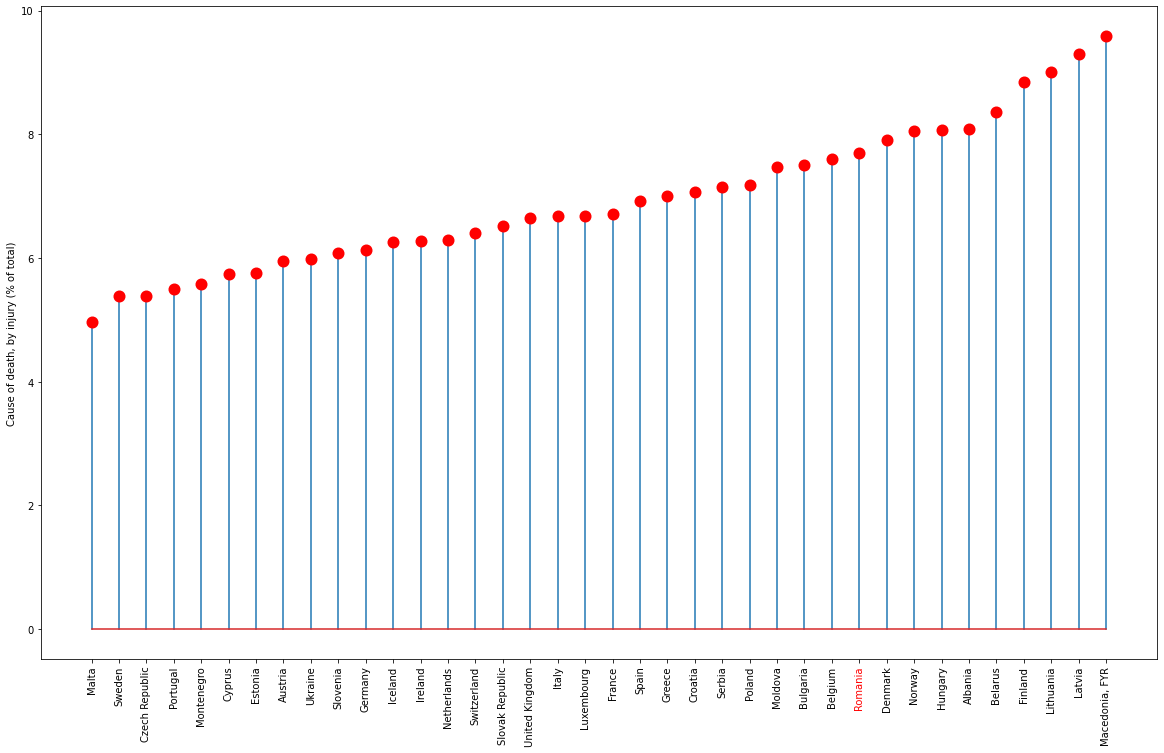

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


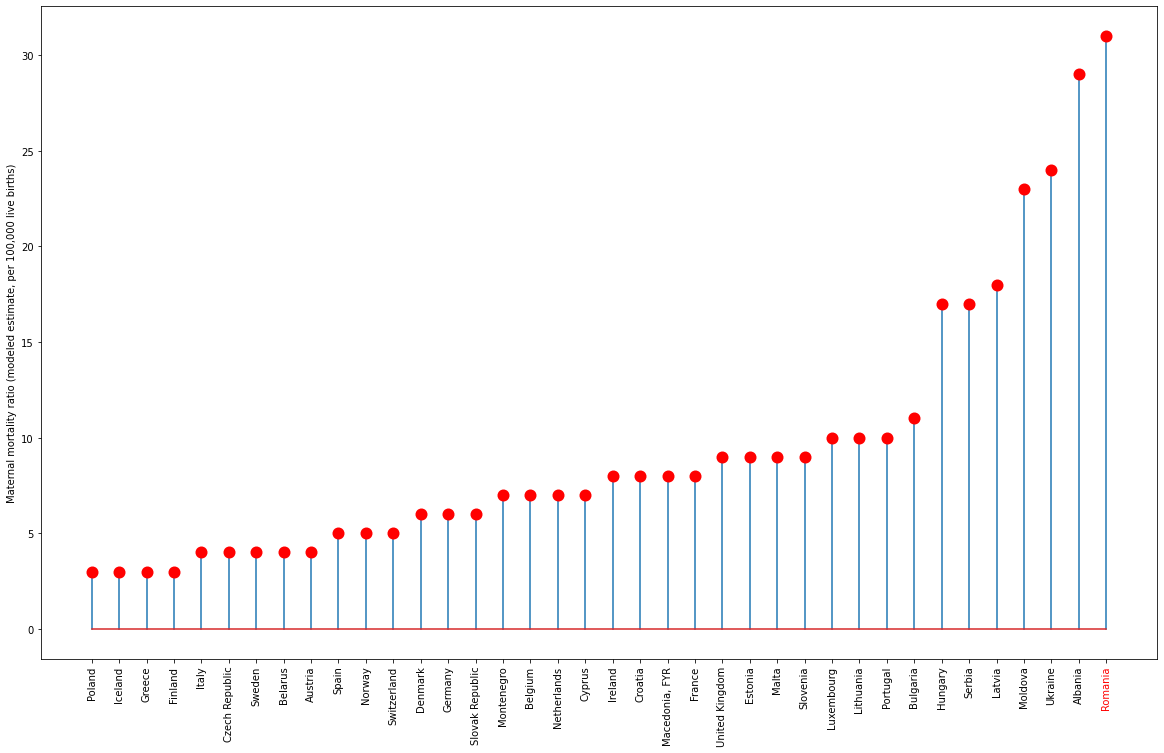

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


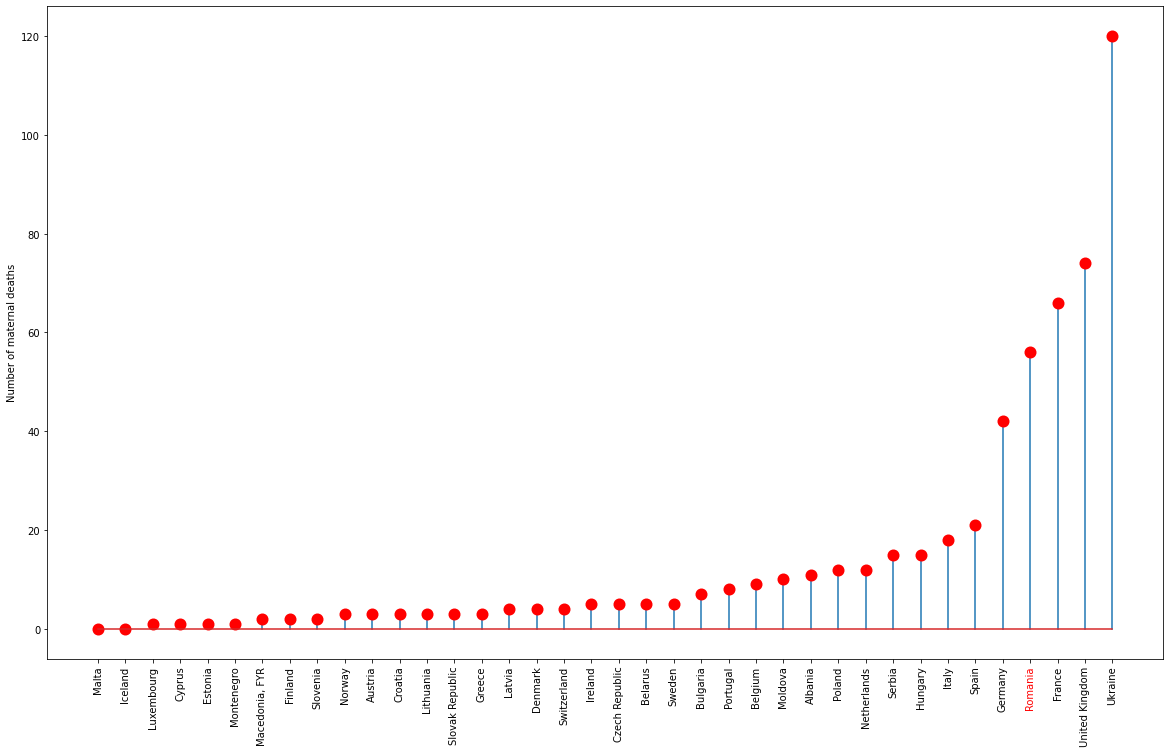

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


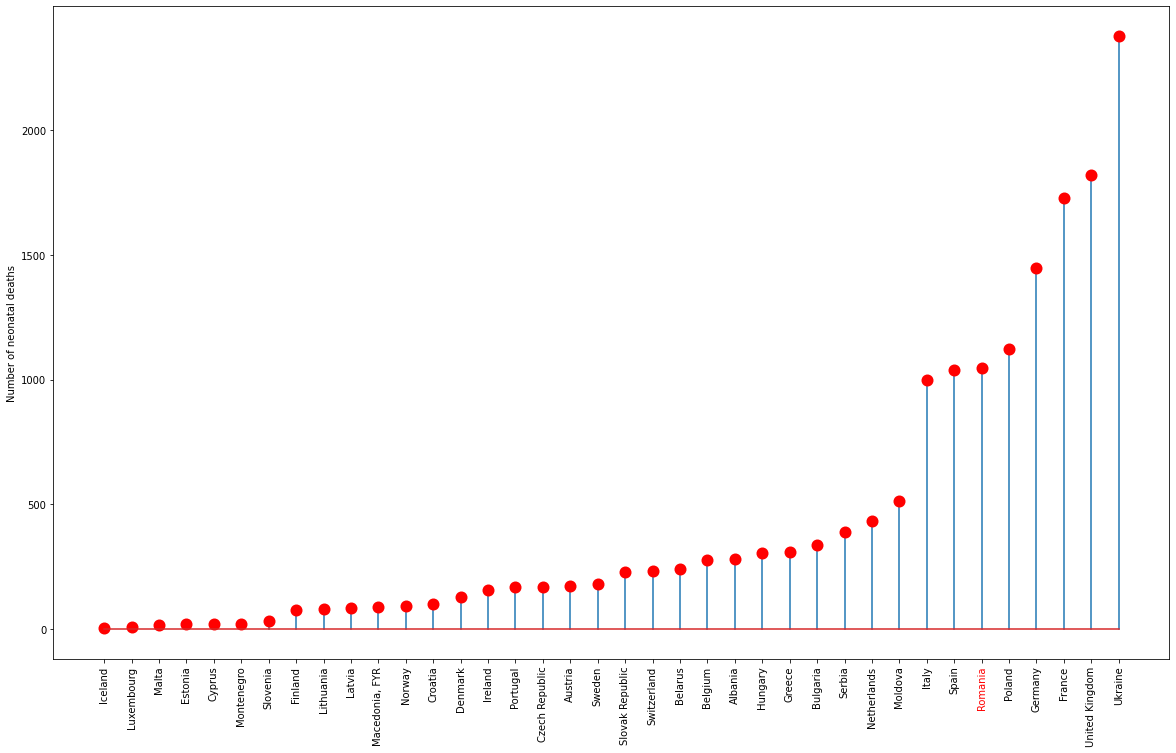

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


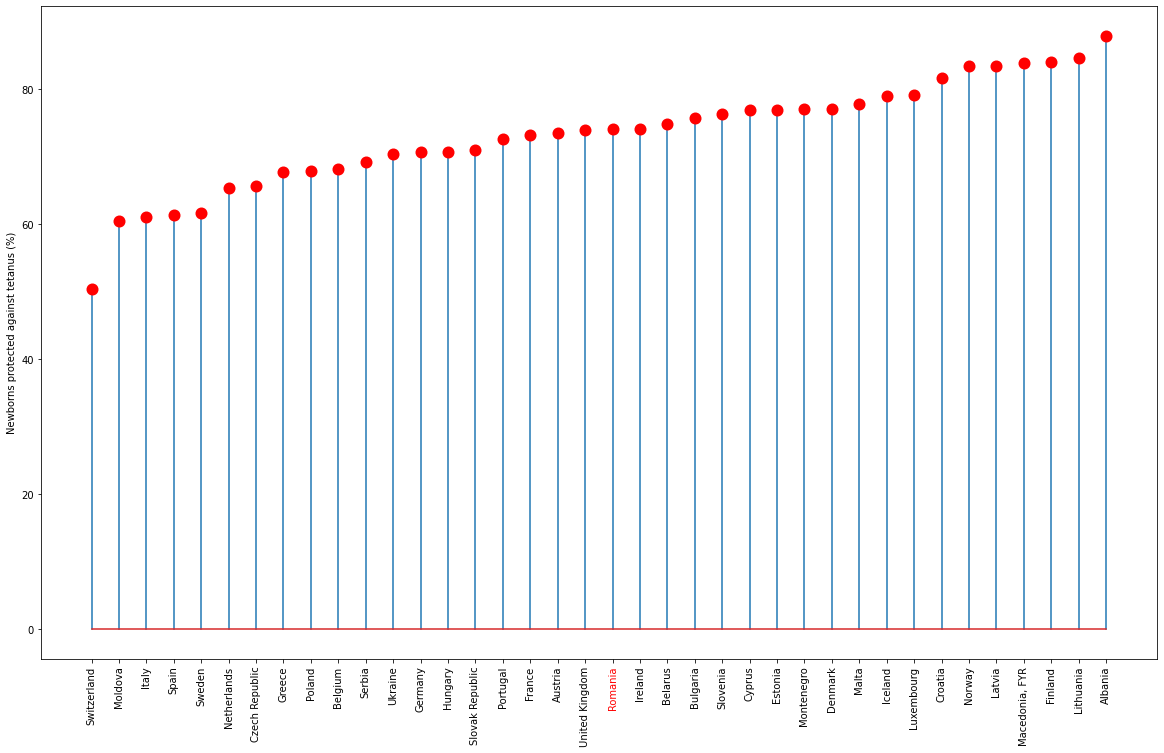

In [42]:
import os

year = 2015
if 'Bosnia and Herzegovina' in european_countries:
    european_countries.remove('Bosnia and Herzegovina')
    
for col in cols:
    df = dfu[dfu['Country'].isin(european_countries) * dfu['Year'] == year][['Country', col]]

    # Reorder it following the values:
    ordered_df = df.sort_values(by=col)
    my_range=range(len(df.index))

    # Make the plot
    fig = plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(12)
    
    (markers, stemlines, baseline) = plt.stem(ordered_df[col])
    plt.setp(markers, marker='o', markersize=10, color='red', markeredgecolor="red", markeredgewidth=2)
    plt.xticks(my_range, ordered_df['Country'], rotation='vertical')

    plt.ylabel(col)

    xtick_labels = fig.gca().get_xticklabels()
    colors = []
    for label in xtick_labels:
        if label.get_text() == 'Romania':
            colors.append('red')
        else:
            colors.append('black')
    
    for ticklabel, tickcolor in zip(xtick_labels, colors):
        ticklabel.set_color(tickcolor)

    plt.show()

    fig_name = col.replace(' ', '_') + '-year-' + str(year) + '.png'
    fig_path = '/content/gdrive/MyDrive/InfoVis/figures-lollipop/' + fig_name
    fig.savefig(fig_path)
    
    plt.clf()
    plt.close()

<a list of 39 Text major ticklabel objects>

In [47]:
dfu['Population, total']

0        9.249590e+07
1        4.190810e+06
2        9.140158e+07
3        1.042475e+09
4        8.964930e+08
             ...     
13826    2.745528e+06
13827    5.213231e+08
13828    4.220937e+08
13829    4.135362e+08
13830    7.893076e+08
Name: Population, total, Length: 13831, dtype: float64